
# NHANES Dataset Assignment

By: Matthew Clemenzi, Hafsah Hoda, and Nolan Steed

BTC2120H1 Winter 2021



- [Introduction](#Introduction)
- [Useable Fields/Forms](#Useable_Fields/Forms)
- [Variables of Interest](#Variables_of_Interest)
- [Data Wrangling](#Data_Wrangling)
- [Logistic Regression Analysis](#Logistic_Regression_Analysis)
- [Combined Analysis](#Combined_Analysis)
- [Discussion](#Discussion)


## Introduction <a class="anchor" id="Introduction"></a>

The National Health and Nutrition Examination Survey (NHANES) is a study that was designed to evaluate the health and nutritional status of children and adults in the United States. It began in the 1960s as a part of the National Centre for Health Statistics (NCHS), which is a part of the Centre for Disease Control and Prevention (CDC). NHANES sends trained interviewers to the homes of selected participants, and these interviewers use a Computer-Assisted Personal Interview (CAPI) system to assist them. This is beneficial because it comes with built-in consistency checks, and it helps define terms that the general public may not be familiar with. After collection, the data is reviewed by NHANES staff to ensure completeness and accuracy.

We were interested in Diabetes because over 34 million Americans have been diagnosed with this disease - primarily Type II. Type I diabetes is usually diagnosed at a younger age, and it is when the body doesn’t produce enough insulin. This can be managed via insulin therapies. Type II diabetes is when the body is not able to use insulin properly, and it is managed by maintaining a healthy diet, staying active, and using pharmaceutical therapies. This type of diabetes is typically diagnosed later in life, with the average being at about 45 years of age. However, recent trends have shown that younger people are getting diagnosed with Type II diabetes more often. The difficulty in diagnosis is that the symptoms develop over a number of years, so it is tough to catch it early on. Thus, physicians have been turning to risk factors and trying to inform patients of what they should watch out for if they fall into a high-risk category based on family history, weight/BMI, their level of physical activity, and their racial background. We would like to further explore these risk factors.

The data we used from NHANES was collected in 2017-2018 and published within the last year, with the most recent update being in February 2021. We read in a large group of datasets (shown below), then filtered for ones that were relevant to our research questions related to diabetes and health status.


In [1]:
# This loads in packages that are necessary to peform some functions. ex: numpy is used for some mathematical operators.

# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import scipy.stats as ss

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
#Read in the datasets from xpt SAS format
#Brought in datasets related to diabetes/obesity
demographics = pd.read_sas('DEMO_J.xpt')
biochem = pd.read_sas('BIOPRO_J.xpt')
body_measures = pd.read_sas('BMX_J.xpt')
blood_pressure = pd.read_sas('BPX_J.xpt')
cardiovascular = pd.read_sas('CDQ_J.xpt')
blood_pressure_cholesterol = pd.read_sas('BPQ_J.xpt')
diabetes = pd.read_sas('DIQ_J.xpt')
diet_nutrition = pd.read_sas('DBQ_J.xpt')
drug_use = pd.read_sas('DUQ_J.xpt')
fasting = pd.read_sas('FASTQX_J.xpt')
glucose = pd.read_sas('GLU_J.xpt')
hdl_cholesterol = pd.read_sas('HDL_J.xpt')
c_reactive_protein = pd.read_sas('HSCRP_J.xpt')
current_health = pd.read_sas('HSQ_J.xpt')
insulin = pd.read_sas('INS_J.xpt')
physical_activity = pd.read_sas('PAQ_J.xpt')
repro_health = pd.read_sas('RHQ_J.xpt')
sleep = pd.read_sas('SLQ_J.xpt')
smoking = pd.read_sas('SMQ_J.xpt')
total_cholesterol = pd.read_sas('TCHOL_J.xpt')
ldl_triglycerides = pd.read_sas('TRIGLY_J.xpt')
urine_flow = pd.read_sas('UCFLOW_J.xpt')
weight_history = pd.read_sas('WHQ_J.xpt')
weight_history_youth = pd.read_sas('WHQMEC_J.xpt')

## Useable Fields/Forms <a class="anchor" id="Useable_Fields/Forms"></a>

We searched through each dataset to identify which fields and/or forms would be usable for our planned analysis or for future exploratory analysis. These are listed below. **Note:** The fields have coded names and values, follow the relevant link for more details.



### demographics
https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm#SDMVSTRA

- RIAGENDR - Gender
- RIDAGEYR - Age in years at screening
- RIDRETH1 - Race/Hispanic origin
- RIDRETH3 - Race/Hispanic origin w/ NH Asian
- DMDEDUC3 - Education level - Children/Youth 6-19
- DMDEDUC2 - Education level - Adults 20+
- INDHHIN2 - Annual household income
- INDFMIN2 - Annual family income
- INDFMPIR - Ratio of family income to poverty


### biochem
standard biochemistry profile (ages 12+)

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BIOPRO_J.htm
- LBXSNASI = sodium (mmol/L)
- LBDSCHSI = cholesterol in refrigerated serum (mmol/L)
- LBDSTRSI = triglycerides in refrigerated serum (mmol/L)

### body_measures
https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BMX_J.htm
- BMXWT = weight (kg)
- BMXBMI = BMI (kg/m$^2$)

### blood_pressure
collected 3 BP readings following 5 minutes rest. Can focus on only the first one

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BPX_J.htm
- BPXSY1 = systolic blood pressure
- BPXDI1 = diastolic blood pressure
- BPXCHR = heart rate for children 0-7 yrs
- BPXPLS = pulse/heart rate for 8 yrs+

### blood_pressure_cholesterol
questionnaire for 16 yrs+

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BPQ_J.htm
- BPD035 - Age told had hypertension

### diabetes
fields with 175 seem to be from the same dropdown (risk factor for diabetes)

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DIQ_J.htm


- DIQ010 = doctor told you have diabetes / diagnosed
- DIQ175A = family history (1 = yes)
- DIQ175B = overweight (11 = overweight)
- DIQ175G - lack of physical activity (16 = lack)
- DIQ175H - high blood pressure (17 = yes)
- DIQ175I - high blood sugar (18 = yes)
- DIQ175J - high blood cholesterol (18 = yes)

### diet_nutrition
self-reported questionnaire

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DBQ_J.htm#DBQ700

- DBQ700 - How healthy is the diet
- DBD895 - # of meals not home prepared
- DBD900 - # of meals from fast food or pizza place


### drug_use
questionnaire for 18+

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DUQ_J.htm#DUQ290
- DUQ217 = marijuana frequency
- DUQ272 = times used cocaine
- DUQ290 = ever used heroin (1 = yes, 2 = no)
- DUQ330 = times used methamphetamine
- DUQ430 = ever been in drug rehab program (1 = yes, 2 = no)


### glucose
plasma fasting glucose

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/GLU_J.htm
- LBXGLU - fasting glucose (mg/dL)
- LBDGLUSI - fasting glucose (mmol/L)

### hdl_cholesterol
https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HDL_J.htm

- LBDHDD - Direct HDL-Cholesterol (mg/dL)
- LBDHDDSI - Direct HDL-Cholesterol (mmol/L)

### c_reactive_protein
Serum levels of CRP with detection limit of 0.15 mg/L

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HSCRP_J.htm
- LBXHSCRP - HS C-Reactive Protein (mg/L)

### current_health
questionnaire

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HSQ_J.htm#HSD010

- HSD010 - General health condition 
1 = excellent
2 = very good
3 = good
4 = fair
5 = poor


### insulin
measures for participants 12 yrs+

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/INS_J.htm

- LBXIN - Insulin (uU/mL)
- LBDINSI - Insulin (pmol/L)

### physical_activity
questionnaire for participants 18 yrs+

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/PAQ_J.htm

- PAD680 - Minutes sedentary activity (mins/day)
- PAD675 - Minutes moderate recreational activities (mins/day)
- PAQ660 - Minutes vigorous recreational activities (mins/day)

### repro_health
for females only (12 yrs+)

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/RHQ_J.htm#RHQ162

- RHQ162 - During pregnancy, told you have diabetes (1 = yes, 2 = no)
- RHQ076 - Seen a doctor because unable to become pregnant (1 = yes, 2 = no)

### sleep
questions on sleep habits and disorders based on the Munich ChronoType Questionnaire (Roenneberg et al., 2003)

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/SLQ_J.htm

- SLD012 - Sleep hours, weekdays or workdays (hrs/night)
- SLD013 - Sleep hours, weekends (hrs/night)
- SLQ050 - Ever told doctor had trouble sleeping (1 = yes, 2 = no)

### smoking
cigarette use, for participants 12 yrs+

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/SMQ_J.htm
- SMQ040 - Do you now smoke cigarettes? (1 = everyday, 2 = some days, 3 = not at all)
- SMQ900 - Ever used an e-cigarette? (1 = yes, 2 = no)
- SMQ905 - How many days have you used an e-cigarette within the last month?

### total_cholesterol
participants aged 6 yrs+

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/TCHOL_J.htm
- LBXTC - Total Cholesterol (mg/dL)
- LBDTCSI - Total Cholesterol (mmol/L)

### ldl_triglycerides
participants aged 12 yrs+

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/TRIGLY_J.htm

- LBXTR - Triglyceride (mg/dL)
- LBDTRSI - Triglyceride (mmol/L)
- LBDLDL - LDL-Cholesterol, Friedewald method (mg/dL)
- LBDLDLSI - LDL-Cholesterol, Friedewald (mmol/L)

### urine_flow
measurement of the quantity of urine in specified period of time (ex: mL/min). Collected from participants aged 3 yrs+

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/UCFLOW_J.htm

- URXVOL1 - The volume of urine collection #1 (mL)
- URDTIME1 - Minutes b/w last urination & urine # 1
- URXVOL2 - The volume of urine collection #2 (mL)
- URDTIME2 - Minutes b/w urine # 1 & urine # 2
- URXVOL3 - The volume of urine collection #3 (mL)
- URDTIME3 - Minutes b/w urine # 2 & urine # 3
Can create new variable to calculate:
$$Urinary flow rate = (URXVOL1 + URXVOL2 + URXVOL3)/(URXTIME1 + URXTIME2 + URXTIME3)$$

### weight_history
for participants aged 16 yrs+

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/WHQ_J.htm

- WHD140 - Self-reported greatest weight (pounds)
- WHQ150 - Age when heaviest weight


### Datasets we should omit
- cardiovascular --> questionnaire answered by adults 40+, only answers questions related to angina pectoralis

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/CDQ_J.htm

- fasting --> while confirmation of fasting is critical to the glucose/insulin/etc data, this dataset does not contain info useful for our potential questions

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/FASTQX_J.htm

- weight_history_youth --> this questionnaire only had responses from children 8-15 yrs and considered self-image and dieting

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/WHQMEC_J.htm

## Variables of Interest <a class="anchor" id="Variables_of_Interest"></a>


For this assignment, our group divided the datasets into three categories; behavioural, biomarker, and demographics data. Our research question centred around determining which of these three categories is best able to predict whether or not a patient has been diagnosed with diabetes. In addition to this, we wanted to explore what factors people consider when they are self-reporting on their health status. We generated a logistic regression model using variables  from these categories.


#### Biomarker variables of Interest

LBXSNASI - sodium <br> 
LBDSCHSI - cholesterol <br>
LBDSTRSI - triglycerides <br>
BMXWT - body weight <br>
BMXBMI - BMI <br>
LBDGLUSI - glucose <br>
LBDHDDSI - HDL cholesterol <br>
LBDLDLSI - LDL cholesterol <br>
LBXHSCRP - C-reactive protein <br>
LBDINSI - insulin

#### Behaviour variables of interest

DBQ700 - Self-reported healthiness of diet <br>
DBD900 - Frequency of fast food <br>
PAD680 - Minutes sedentary activity (mins/day) <br>
PAD675 - Minutes moderate recreational activities (mins/day) <br>
PAQ650 - Vigorous recreational activities within a week (1 = yes, 2 = no) <br> 
SLD012 - Sleep hours, weekdays or workdays (hrs/night) <br>
SLD013 - Sleep hours, weekends (hrs/night)

#### Demographic variables of interest

RIAGENDR - Gender <br>
RIDAGEYR - Age in years at screening <br>
RIDRETH3 - Race/Hispanic origin w/ NH Asian <br>
DMDEDUC2 - Education level - Adults 20+ <br>
INDFMPIR - Ratio of family income to poverty


#### Health Outcomes of Interest (*Dependent Variables*)
DIQ010 - Diabetes diagnosis <br>
HSD010 - Current health status (subjective, scale 1-5)



In [3]:
# Example of what each dataset looks like prior to cleaning
body_measures.head()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,93703.0,1.0,13.7,3.0,89.6,NaN,NaN,NaN,88.6,NaN,...,NaN,NaN,18.0,NaN,16.2,NaN,48.2,NaN,NaN,NaN
1,93704.0,1.0,13.9,NaN,95.0,NaN,NaN,NaN,94.2,NaN,...,NaN,NaN,18.6,NaN,15.2,NaN,50.0,NaN,NaN,NaN
2,93705.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,...,37.0,NaN,36.0,NaN,32.0,NaN,101.8,NaN,110.0,NaN
3,93706.0,1.0,66.3,NaN,NaN,NaN,NaN,NaN,175.7,NaN,...,46.6,NaN,38.8,NaN,27.0,NaN,79.3,NaN,94.4,NaN
4,93707.0,1.0,45.4,NaN,NaN,NaN,NaN,NaN,158.4,NaN,...,38.1,NaN,33.8,NaN,21.5,NaN,64.1,NaN,83.0,NaN


In [4]:
demographics.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,...,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


## Data Wrangling <a class="anchor" id="Data_Wrangling"></a>

During the process of data collection by the NHANES team, these datasets were reviewed for completeness, consistency, and illogical values. Thus, most "out of range" or missing data have already been dealt with!

We decided that for ease of analysis, we should remove unnecessary fields from each dataset and subsequently join the dataframes together to create a single dataframe with which to perform the analyses.

A common factor between each dataset is the field **SEQN** (Respondent Sequence Number), a unique identifier for each participant in the survey. However, each questionnaire, test, and lab dataset has a unique set of individuals for which they captured data; for instance, the data for reproductive health was only collected from female participants, and data related to smoking was only captured from individuals aged 12 years and older. As a result, the list of SEQN values between datasets were not identical - thus, a simple "df.join()" function could not be used. What was used instead was a "full join", performed by **pd.merge(df, new_df, on="variable", how='outer')**, by which the dataframes are joined on the basis of a unique variable (SEQN in our case).

In [5]:
# Delete the unnecessary data columns
demographics = demographics[["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH3", 
                             "DMDEDUC2", "INDHHIN2", "INDFMIN2","INDFMPIR"]]

biochem = biochem[["SEQN","LBXSNASI","LBDSCHSI", "LBDSTRSI"]]

body_measures = body_measures[["SEQN", "BMXWT","BMXBMI"]]

blood_pressure = blood_pressure[["SEQN","BPXSY1","BPXDI1","BPXCHR","BPXPLS"]]

blood_pressure_cholesterol = blood_pressure_cholesterol[["SEQN","BPD035"]]

diabetes = diabetes[["SEQN","DIQ010","DIQ175A","DIQ175B","DIQ175G","DIQ175H","DIQ175I","DIQ175J"]]

diet_nutrition = diet_nutrition[["SEQN","DBQ700","DBD895","DBD900"]]

drug_use = drug_use[["SEQN","DUQ217","DUQ272","DUQ290","DUQ330","DUQ430"]]

glucose = glucose[["SEQN","LBXGLU","LBDGLUSI"]]

hdl_cholesterol = hdl_cholesterol[["SEQN","LBDHDD","LBDHDDSI"]]

c_reactive_protein = c_reactive_protein[["SEQN","LBXHSCRP"]]

current_health = current_health[["SEQN","HSD010"]]

insulin = insulin[["SEQN","LBXIN","LBDINSI"]]

physical_activity = physical_activity[["SEQN","PAD680","PAD675","PAD660"]]

repro_health = repro_health[["SEQN","RHQ162","RHQ076"]]

sleep = sleep[["SEQN","SLD012","SLD013","SLQ050"]]

smoking = smoking[["SEQN","SMQ040","SMQ900","SMQ905"]]

total_cholesterol = total_cholesterol[["SEQN","LBXTC","LBDTCSI"]]

ldl_triglycerides = ldl_triglycerides[["SEQN","LBXTR","LBDTRSI","LBDLDL","LBDLDLSI"]]

urine_flow = urine_flow[["SEQN","URXVOL1","URDTIME1","URXVOL2","URDTIME2","URXVOL3","URDTIME3"]]

weight_history = weight_history[["SEQN","WHD140","WHQ150"]]


In [6]:
# To demonstrate that different datasets contain differing numbers of participant responses:

print(len(biochem["SEQN"]), len(demographics["SEQN"]))


# the issue: the datasets aren't the same length... how do we combine the data without having frameshifts?
# how do we make sure the SEQN are consistent when we join the new data?

6401 9254


In [7]:
#Vector of Datasets, other than demographics (starting point)

dataset_list = [biochem, 
                body_measures, 
                blood_pressure, 
                blood_pressure_cholesterol, 
                diabetes, 
                diet_nutrition, 
                drug_use, 
                glucose, 
                hdl_cholesterol, 
                c_reactive_protein, 
                current_health, 
                insulin, 
                physical_activity, 
                repro_health, 
                sleep, 
                smoking, 
                total_cholesterol, 
                ldl_triglycerides, 
                urine_flow, 
                weight_history]

In [8]:
# Full-Join the datasets

full_data = demographics

for i in dataset_list:
    full_data = pd.merge(full_data,i,on="SEQN",how='outer')

full_data

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,INDHHIN2,INDFMIN2,INDFMPIR,LBXSNASI,LBDSCHSI,...,LBDLDL,LBDLDLSI,URXVOL1,URDTIME1,URXVOL2,URDTIME2,URXVOL3,URDTIME3,WHD140,WHQ150
0,93703.0,2.0,2.0,6.0,NaN,15.0,15.0,5.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,1.0,2.0,3.0,NaN,15.0,15.0,5.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,2.0,66.0,4.0,2.0,3.0,3.0,0.82,141.0,4.060,...,NaN,NaN,248.0,206.0,NaN,NaN,NaN,NaN,170.0,62.0
3,93706.0,1.0,18.0,6.0,NaN,NaN,NaN,NaN,144.0,3.853,...,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,150.0,17.0
4,93707.0,1.0,13.0,7.0,NaN,10.0,10.0,1.88,137.0,5.146,...,NaN,NaN,100.0,190.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102952.0,2.0,70.0,6.0,3.0,4.0,4.0,0.95,143.0,3.129,...,43.0,1.112,63.0,120.0,NaN,NaN,NaN,NaN,120.0,23.0
9250,102953.0,1.0,42.0,1.0,3.0,12.0,12.0,NaN,144.0,4.758,...,NaN,NaN,63.0,119.0,NaN,NaN,NaN,NaN,222.0,41.0
9251,102954.0,2.0,41.0,4.0,5.0,10.0,10.0,1.18,137.0,4.448,...,108.0,2.793,158.0,152.0,NaN,NaN,NaN,NaN,180.0,38.0
9252,102955.0,2.0,14.0,4.0,NaN,9.0,9.0,2.24,138.0,3.905,...,NaN,NaN,291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Notice that the dataset still contains 9254 rows!

print(len(full_data))


9254


In [10]:
# Keeping Individuals 20 years and older as per our Inclusion Criteria

data = full_data[~(full_data['RIDAGEYR'] < 19)]

data

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,INDHHIN2,INDFMIN2,INDFMPIR,LBXSNASI,LBDSCHSI,...,LBDLDL,LBDLDLSI,URXVOL1,URDTIME1,URXVOL2,URDTIME2,URXVOL3,URDTIME3,WHD140,WHQ150
2,93705.0,2.0,66.0,4.0,2.0,3.0,3.0,0.82,141.0,4.060,...,NaN,NaN,248.0,206.0,NaN,NaN,NaN,NaN,170.0,62.0
5,93708.0,2.0,66.0,6.0,1.0,6.0,6.0,1.63,144.0,5.431,...,109.0,2.819,15.0,30.0,102.0,66.0,NaN,NaN,120.0,40.0
6,93709.0,2.0,75.0,4.0,4.0,2.0,2.0,0.41,141.0,4.655,...,NaN,NaN,11.0,103.0,14.0,76.0,NaN,NaN,200.0,50.0
8,93711.0,1.0,56.0,6.0,5.0,15.0,15.0,5.00,140.0,6.181,...,156.0,4.034,26.0,43.0,48.0,168.0,NaN,NaN,152.0,33.0
10,93713.0,1.0,67.0,3.0,3.0,6.0,6.0,2.65,139.0,4.862,...,NaN,NaN,60.0,85.0,NaN,NaN,NaN,NaN,195.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,102950.0,1.0,64.0,4.0,3.0,7.0,7.0,2.13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,45.0
9249,102952.0,2.0,70.0,6.0,3.0,4.0,4.0,0.95,143.0,3.129,...,43.0,1.112,63.0,120.0,NaN,NaN,NaN,NaN,120.0,23.0
9250,102953.0,1.0,42.0,1.0,3.0,12.0,12.0,NaN,144.0,4.758,...,NaN,NaN,63.0,119.0,NaN,NaN,NaN,NaN,222.0,41.0
9251,102954.0,2.0,41.0,4.0,5.0,10.0,10.0,1.18,137.0,4.448,...,108.0,2.793,158.0,152.0,NaN,NaN,NaN,NaN,180.0,38.0


In [11]:
# Show that we kept 5712 of 9254 entries
print(len(full_data))
print(len(data))

9254
5712


In [12]:
# Cleaning for DIQ010
# Convert the scale into a binary measure (0 = No, 1 = Yes)
# Remove missing values; Convert "Borderline" into "Yes"; Remove "Don't Know"

data['DIQ010'] = data['DIQ010'].astype('Int64')

data.loc[data['DIQ010'] == 2, 'DIQ010'] = 0
data.loc[data['DIQ010'] == 3, 'DIQ010'] = 1
data.loc[data['DIQ010'] == 9, 'DIQ010'] = np.nan

data = data.dropna(axis=0, subset=['DIQ010'])

data['DIQ010'] = data['DIQ010'].astype('Float64')

# we understand the warning/caveat gave by this output, and are sure that nothing unwanted is happening to our data

<ipython-input-12-5f260da3a4fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIQ010'] = data['DIQ010'].astype('Int64')
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [13]:
data["HSD010"]

2       3.0
5       3.0
6       NaN
8       2.0
10      2.0
       ... 
9247    NaN
9249    2.0
9250    4.0
9251    3.0
9253    3.0
Name: HSD010, Length: 5708, dtype: float64

In [14]:
# Remove missing values from HSD010 (Health Status) column
# Turn 9 into Nan and remove
# Want 1-3 = 1, 4-5 = 0 


data = data.dropna(axis=0, subset=['HSD010'])

data['HSD010'] = data['HSD010'].astype('Int64')

data.loc[data['HSD010'] == 9, 'HSD010'] = np.nan
data.loc[data['HSD010'] == 2, 'HSD010'] = 1
data.loc[data['HSD010'] == 3, 'HSD010'] = 1
data.loc[data['HSD010'] == 4, 'HSD010'] = 0
data.loc[data['HSD010'] == 5, 'HSD010'] = 0

data = data.dropna(axis=0, subset=['HSD010'])

data['HSD010'] = data['HSD010'].astype('float64')


In [15]:
data["HSD010"]

2       1.0
5       1.0
8       1.0
10      1.0
11      1.0
       ... 
9246    1.0
9249    1.0
9250    0.0
9251    1.0
9253    1.0
Name: HSD010, Length: 5007, dtype: float64

In [16]:
# Show that we removed 700 missing instances and 3 instances of 9 from HSD010
print(len(data))

5007


In [74]:
# Show the differences in the dataset before and after initial cleaning
full_data.describe(include = "all")

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,INDHHIN2,INDFMIN2,INDFMPIR,LBXSNASI,LBDSCHSI,...,LBDLDL,LBDLDLSI,URXVOL1,URDTIME1,URXVOL2,URDTIME2,URXVOL3,URDTIME3,WHD140,WHQ150
count,9254.000000,9254.000000,9.254000e+03,9254.000000,5569.000000,8763.000000,8780.000000,8.023000e+03,5904.000000,5903.000000,...,2808.000000,2808.000000,7.636000e+03,5841.000000,1223.000000,1223.000000,33.000000,33.000000,5855.000000,5770.000000
mean,98329.500000,1.507564,3.433423e+01,3.497190,3.525768,12.500057,12.202506,2.375490e+00,140.324018,4.738640,...,106.852920,2.763224,1.043337e+02,156.254408,107.749796,104.824203,105.030303,67.030303,333.372673,782.113518
std,2671.544029,0.499970,2.550028e+01,1.700961,1.240231,17.307571,17.155294,1.600291e+00,2.752762,1.067702,...,35.586041,0.920248,7.903528e+01,119.538593,86.387347,37.337177,100.563874,28.810246,1136.139085,8558.048461
min,93703.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,5.397605e-79,121.000000,1.991000,...,18.000000,0.465000,5.397605e-79,2.000000,1.000000,12.000000,3.000000,31.000000,90.000000,10.000000
25%,96016.250000,1.000000,1.100000e+01,3.000000,3.000000,6.000000,6.000000,1.040000e+00,138.000000,3.957000,...,82.000000,2.121000,4.500000e+01,82.000000,43.000000,78.000000,27.000000,49.000000,160.000000,27.000000
50%,98329.500000,2.000000,3.100000e+01,3.000000,4.000000,8.000000,8.000000,1.920000e+00,140.000000,4.655000,...,103.000000,2.664000,8.300000e+01,125.000000,78.000000,105.000000,68.000000,55.000000,190.000000,40.000000
75%,100642.750000,2.000000,5.800000e+01,4.000000,4.000000,14.000000,14.000000,3.690000e+00,142.000000,5.379000,...,128.000000,3.310000,1.410000e+02,189.000000,150.000000,130.000000,127.000000,77.000000,230.000000,55.000000
max,102956.000000,2.000000,8.000000e+01,7.000000,9.000000,99.000000,99.000000,5.000000e+00,151.000000,11.327000,...,357.000000,9.232000,4.550000e+02,1406.000000,444.000000,213.000000,373.000000,148.000000,9999.000000,99999.000000


In [73]:
data.describe(include = "all")

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,INDHHIN2,INDFMIN2,INDFMPIR,LBXSNASI,LBDSCHSI,...,LBDLDL,LBDLDLSI,URXVOL1,URDTIME1,URXVOL2,URDTIME2,URXVOL3,URDTIME3,WHD140,WHQ150
count,5007.000000,5007.000000,5007.000000,5007.000000,4887.000000,4764.000000,4779.000000,4.388000e+03,4711.000000,4710.000000,...,2261.000000,2261.000000,4.911000e+03,4350.000000,760.000000,760.000000,21.000000,21.000000,5006.000000,4950.000000
mean,98270.657679,1.510086,50.542241,3.478730,3.547780,12.290722,11.944968,2.552589e+00,140.327107,4.859922,...,109.980982,2.844112,1.042368e+02,147.257241,113.838158,114.056579,83.761905,70.761905,301.991011,642.932323
std,2683.241345,0.499948,18.073842,1.631166,1.216663,16.829575,16.728688,1.609807e+00,2.778860,1.074213,...,36.394655,0.941156,7.733171e+01,107.688713,87.145700,35.080644,86.800291,33.096684,985.398457,7707.619790
min,93705.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,121.000000,1.991000,...,18.000000,0.465000,5.397605e-79,4.000000,1.000000,22.000000,3.000000,31.000000,90.000000,12.000000
25%,95933.000000,1.000000,35.000000,3.000000,3.000000,6.000000,5.000000,1.190000e+00,138.500000,4.112000,...,85.000000,2.198000,4.700000e+01,79.000000,48.000000,91.000000,24.000000,49.000000,160.000000,27.000000
50%,98257.000000,2.000000,52.000000,3.000000,4.000000,8.000000,8.000000,2.150000e+00,140.000000,4.758000,...,107.000000,2.767000,8.300000e+01,121.000000,84.000000,115.500000,50.000000,61.000000,190.000000,40.000000
75%,100576.500000,2.000000,65.000000,4.000000,4.000000,14.000000,14.000000,4.080000e+00,142.000000,5.508000,...,132.000000,3.414000,1.395000e+02,178.000000,160.250000,136.000000,108.000000,85.000000,230.000000,55.000000
max,102956.000000,2.000000,80.000000,7.000000,9.000000,99.000000,99.000000,5.000000e+00,151.000000,11.327000,...,357.000000,9.232000,4.410000e+02,1243.000000,444.000000,213.000000,294.000000,148.000000,9999.000000,99999.000000


We cleaned the full dataset by removing missing instances of DIQ010 (Diabetes Diagnosis) and HSD010 (Health Status), and removing data from participants less than 20 years of age. This resulted in the removal of 4247 rows.

In [17]:
# Splitting the data between demographics, biomarkers, and behaviour

# Put variable names in vectors, including SEQN and health outcomes
biomarker_variables = ["SEQN", "DIQ010", "HSD010", "LBXSNASI", "LBDSCHSI", "LBDSTRSI", 
                       "BMXWT", "BMXBMI", "LBDGLUSI", "LBDHDDSI", "LBDLDLSI", "LBXHSCRP", "LBDINSI"]

behaviour_variables = ["SEQN", "DIQ010", "HSD010", "DBQ700", "DBD900", 
                       "PAD680", "PAD675", "PAD660", "SLD012", "SLD013"]

demographic_variables = ["SEQN", "DIQ010", "HSD010", "RIAGENDR", 
                         "RIDAGEYR", "RIDRETH3", "DMDEDUC2", "INDFMPIR"]



# Redefine new dataframes based on list of variables
biomarker_data = data[biomarker_variables]

behaviour_data = data[behaviour_variables]

demographic_data = data[demographic_variables]

In [18]:
# Look at the percent of missing values for each variable 
na_perc = biomarker_data.isnull().sum()/len(biomarker_data)*100
print(na_perc)

SEQN         0.000000
DIQ010       0.000000
HSD010       0.000000
LBXSNASI     5.911724
LBDSCHSI     5.931696
LBDSTRSI     5.971640
BMXWT        1.178350
BMXBMI       1.318155
LBDGLUSI    53.565009
LBDHDDSI     5.512283
LBDLDLSI    54.843219
LBXHSCRP     6.051528
LBDINSI     54.543639
dtype: float64


## Logistic Regression Analysis <a class="anchor" id="Logistic_Regression_Analysis"></a>

Both of the dependent variables, diabetes diagnosis and self-reported health score were categorical variables which we grouped into binary outcomes. The diabetes diagnosis was grouped into either yes or no and the self-reported health score was grouped into healthy and not healthy. Since we had binary dependent variables, we used logistic regression rather than linear regression for our models. Using linear regression for binary dependent variables is not well suited because it can be hard to meet all of the assumptions for linear regression, such as homoscedasticity. This is when there is a similar variance in Y across the X-axis. Logistic regression tells you if there is a change in the probability in the event occurring. 

**Goal 1:** Develop a model to predict an objective measure of health (Diabetes Diagnosis, DIQ010)

**Goal 2:** Develop a model to predict a subjective measure of health (Self-reported Health Status, HSD010)

**Strategy:**
- Clean the data within each "data type" (biomarker, behavioural, demographic), which includes removing rows with data that are missing completely at random (MCAR), and performing value transformation on some coded values to fit our needs. For example, we will need to create dummy variables for RIDRETH3 (Race).
- Build models based on biomarker variables, behavioural variables, and demographic variables individually to decide which variables to include in the combined regression. Then, build a logistic regression model based on these variables to predict Diabetes Diagnosis and Self-reported Health Status.


### Analysis on Biomarker Data

**Biomarker variables of Interest**
- LBXSNASI - sodium
- LBDSCHSI - cholesterol
- LBDSTRSI - triglycerides
- BMXWT - body weight
- BMXBMI - BMI
- LBDGLUSI - glucose
- LBDHDDSI - HDL cholesterol
- LBDLDLSI - LDL cholesterol
- LBXHSCRP - C-reactive protein
- LBDINSI - insulin

In [19]:
biomarker_data

,SEQN,DIQ010,HSD010,LBXSNASI,LBDSCHSI,LBDSTRSI,BMXWT,BMXBMI,LBDGLUSI,LBDHDDSI,LBDLDLSI,LBXHSCRP,LBDINSI
2,93705.0,0.0,1.0,141.0,4.060,1.073,79.5,31.7,NaN,1.55,NaN,2.72,NaN
5,93708.0,1.0,1.0,144.0,5.431,0.813,53.5,23.7,6.77,2.28,2.819,1.83,58.32
8,93711.0,0.0,1.0,140.0,6.181,0.666,62.1,21.3,5.94,1.86,4.034,0.82,31.68
10,93713.0,0.0,1.0,139.0,4.862,1.073,74.9,23.5,NaN,1.24,NaN,1.66,NaN
11,93714.0,1.0,1.0,139.0,6.000,1.298,87.1,39.9,NaN,1.09,NaN,5.71,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9246,102949.0,0.0,1.0,143.0,5.275,0.700,76.9,23.7,NaN,1.89,NaN,3.72,NaN
9249,102952.0,1.0,1.0,143.0,3.129,1.106,49.0,20.0,8.77,1.55,1.112,0.45,26.34
9250,102953.0,0.0,0.0,144.0,4.758,1.287,97.4,35.8,NaN,1.27,NaN,1.84,NaN
9251,102954.0,0.0,1.0,137.0,4.448,0.723,69.1,26.1,5.22,1.40,2.793,0.81,56.94


In [22]:
biomarker_data = biomarker_data.dropna()

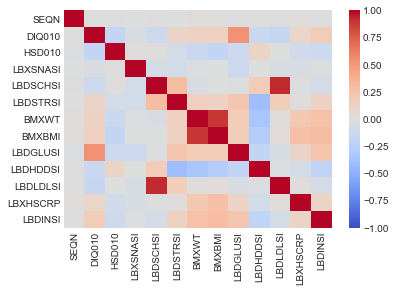

In [20]:
corr_plot = sns.heatmap(biomarker_data.corr(), vmin = -1, vmax = 1, center = 0, cmap = "coolwarm")

In [21]:
biomarker_data.corr()

,SEQN,DIQ010,HSD010,LBXSNASI,LBDSCHSI,LBDSTRSI,BMXWT,BMXBMI,LBDGLUSI,LBDHDDSI,LBDLDLSI,LBXHSCRP,LBDINSI
SEQN,1.000000,0.003625,-0.008598,-0.005907,0.000528,-0.000893,0.021662,0.009967,-0.017639,0.006221,0.001823,0.010480,0.003931
DIQ010,0.003625,1.000000,-0.173407,-0.031831,-0.123756,0.116491,0.140061,0.161124,0.535142,-0.140372,-0.156961,0.109056,0.194138
HSD010,-0.008598,-0.173407,1.000000,0.015113,0.008135,-0.077755,-0.138694,-0.181165,-0.129207,0.111570,-0.002529,-0.089793,-0.111922
LBXSNASI,-0.005907,-0.031831,0.015113,1.000000,-0.074970,-0.078656,-0.014121,-0.006607,-0.128070,-0.006992,-0.042107,-0.039402,-0.009921
LBDSCHSI,0.000528,-0.123756,0.008135,-0.074970,1.000000,0.299939,-0.033089,-0.004142,-0.014232,0.189592,0.924471,-0.014112,-0.064505
LBDSTRSI,-0.000893,0.116491,-0.077755,-0.078656,0.299939,1.000000,0.157592,0.141921,0.240135,-0.399389,0.183324,0.013574,0.139322
BMXWT,0.021662,0.140061,-0.138694,-0.014121,-0.033089,0.157592,1.000000,0.891961,0.182522,-0.333327,0.010557,0.226240,0.268681
BMXBMI,0.009967,0.161124,-0.181165,-0.006607,-0.004142,0.141921,0.891961,1.000000,0.193990,-0.272017,0.025134,0.281421,0.297406
LBDGLUSI,-0.017639,0.535142,-0.129207,-0.128070,-0.014232,0.240135,0.182522,0.193990,1.000000,-0.184069,-0.042099,0.110811,0.250696
LBDHDDSI,0.006221,-0.140372,0.111570,-0.006992,0.189592,-0.399389,-0.333327,-0.272017,-0.184069,1.000000,-0.022424,-0.082386,-0.199563


In [23]:
print(len(biomarker_data))

2214


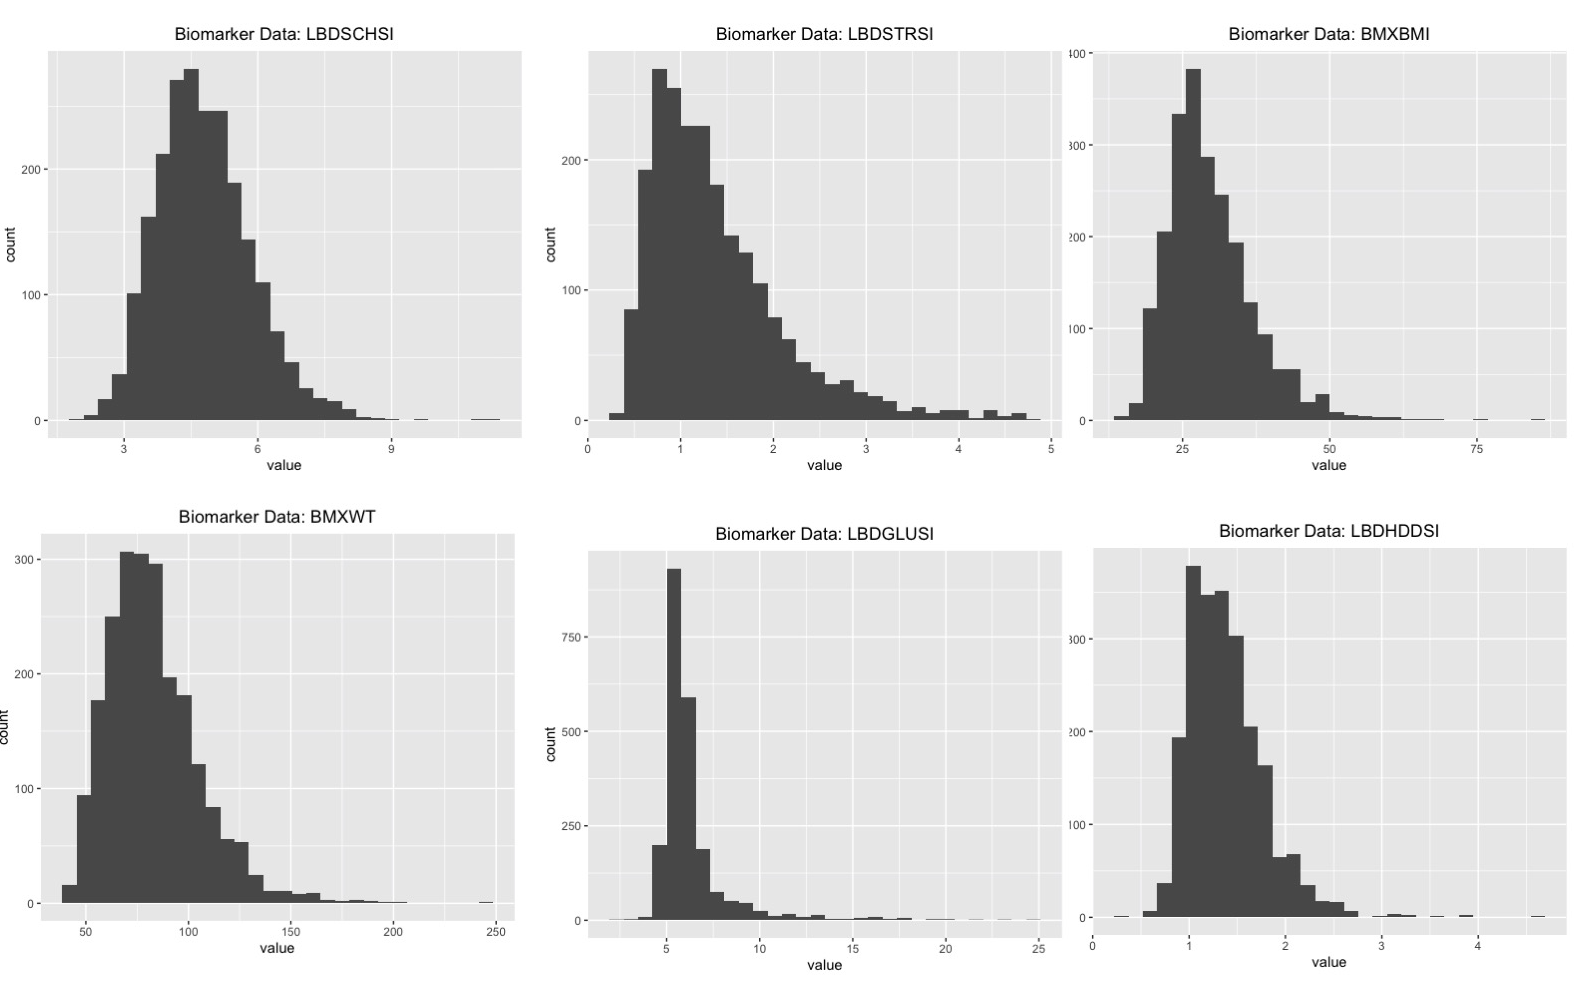

In [24]:
# Regression for Biomarker Variables - DIQ010 (Diabetes Diagnosis)

xtrain = sm.add_constant(biomarker_data[["LBXSNASI", "LBDSCHSI", "LBDSTRSI", 
                                        "BMXWT", "BMXBMI", "LBDGLUSI", "LBDHDDSI", 
                                         "LBDLDLSI", "LBXHSCRP", "LBDINSI"]])

ytrain = biomarker_data["DIQ010"]

biomarker_regression = sm.Logit(ytrain, xtrain).fit()

biomarker_regression.summary()

Optimization terminated successfully.
         Current function value: 0.340671
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DIQ010   No. Observations:                 2214
Model:                          Logit   Df Residuals:                     2203
Method:                           MLE   Df Model:                           10
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.3133
Time:                        17:34:47   Log-Likelihood:                -754.25
converged:                       True   LL-Null:                       -1098.4
Covariance Type:            nonrobust   LLR p-value:                2.034e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.7010      3.670     -4.278      0.000     -22.894      -8.508
LBXSNASI       0.0669      0.025      2.656      0.008       0.018       0.116
LBDSCHSI      -0.8600      0.835     -1.030      0.303      -2.496       0.776
LBDSTRSI       0.5780      0.384      1.504      0.133      -0.175       1.331
BMXWT         -0.0100      0.007     -1.534      0.125      -0.023       0.003
BMXBMI         0.0482      0.020      2.456      0.014       0.010       0.087
LBDGLUSI       0.8712      0.055     15.860      0.000       0.764       0.979
LBDHDDSI       0.6414      0.862      0.744      0.457      -1.048       2.331
LBDLDLSI       0.3038      0.837      0.363      0.717      -1.336       1.944
LBXHSCRP       0.0079      0.008      1.010      0.313      -0.007       0.023
LBDINSI        0.0004      0.001      0.739      0.460      -0.001       0.001
==============================================================================
"""

In [25]:
# Regression for Biomarker Variables - HSD010 (Health Status)

xtrain = sm.add_constant(biomarker_data[["LBXSNASI", "LBDSCHSI", "LBDSTRSI", 
                                        "BMXWT", "BMXBMI", "LBDGLUSI", "LBDHDDSI", 
                                         "LBDLDLSI", "LBXHSCRP", "LBDINSI"]])

ytrain = biomarker_data["HSD010"]

biomarker_regression = sm.Logit(ytrain, xtrain).fit()

biomarker_regression.summary()

Optimization terminated successfully.
         Current function value: 0.540616
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 HSD010   No. Observations:                 2214
Model:                          Logit   Df Residuals:                     2203
Method:                           MLE   Df Model:                           10
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                 0.05058
Time:                        17:34:47   Log-Likelihood:                -1196.9
converged:                       True   LL-Null:                       -1260.7
Covariance Type:            nonrobust   LLR p-value:                 1.489e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1332      2.741      1.508      0.132      -1.238       9.505
LBXSNASI      -0.0088      0.019     -0.465      0.642      -0.046       0.028
LBDSCHSI      -0.4094      0.582     -0.703      0.482      -1.551       0.732
LBDSTRSI      -0.0137      0.271     -0.050      0.960      -0.546       0.518
BMXWT          0.0162      0.005      3.275      0.001       0.007       0.026
BMXBMI        -0.0918      0.015     -6.126      0.000      -0.121      -0.062
LBDGLUSI      -0.0630      0.024     -2.596      0.009      -0.111      -0.015
LBDHDDSI       0.6270      0.609      1.029      0.304      -0.567       1.821
LBDLDLSI       0.4155      0.583      0.712      0.476      -0.728       1.559
LBXHSCRP      -0.0060      0.006     -0.998      0.318      -0.018       0.006
LBDINSI       -0.0003      0.000     -0.753      0.451      -0.001       0.000
==============================================================================
"""

In [26]:
# Regression for Significant Biomarker Variables - DIQ010 (Diabetes Diagnosis)

xtrain = sm.add_constant(biomarker_data[["LBXSNASI", "BMXBMI", "LBDGLUSI"]])

ytrain = biomarker_data["DIQ010"]

biomarker_regression = sm.Logit(ytrain, xtrain).fit()

biomarker_regression.summary()

Optimization terminated successfully.
         Current function value: 0.354032
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DIQ010   No. Observations:                 2214
Model:                          Logit   Df Residuals:                     2210
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.2864
Time:                        17:34:47   Log-Likelihood:                -783.83
converged:                       True   LL-Null:                       -1098.4
Covariance Type:            nonrobust   LLR p-value:                4.849e-136
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3212      3.553     -5.156      0.000     -25.286     -11.357
LBXSNASI       0.0717      0.025      2.902      0.004       0.023       0.120
BMXBMI         0.0280      0.008      3.322      0.001       0.011       0.044
LBDGLUSI       0.9176      0.054     16.866      0.000       0.811       1.024
==============================================================================
"""

In [27]:
# Regression for Significant Biomarker Variables - HSD010 (Health Status)

xtrain = sm.add_constant(biomarker_data[["BMXWT", "BMXBMI", "LBDGLUSI"]])

ytrain = biomarker_data["HSD010"]

biomarker_regression = sm.Logit(ytrain, xtrain).fit()

biomarker_regression.summary()

Optimization terminated successfully.
         Current function value: 0.544494
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 HSD010   No. Observations:                 2214
Model:                          Logit   Df Residuals:                     2210
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                 0.04377
Time:                        17:34:47   Log-Likelihood:                -1205.5
converged:                       True   LL-Null:                       -1260.7
Covariance Type:            nonrobust   LLR p-value:                 9.202e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2813      0.239     13.710      0.000       2.812       3.750
BMXWT          0.0145      0.005      3.019      0.003       0.005       0.024
BMXBMI        -0.0946      0.015     -6.496      0.000      -0.123      -0.066
LBDGLUSI      -0.0866      0.023     -3.765      0.000      -0.132      -0.042
==============================================================================
"""

### Analysis for Behavioural Variables
**Behavioural variables of Interest**
- DBQ700 - Self-reported healthiness of diet
- DBD900 - Frequency of fast food
- PAD680 - Minutes sedentary activity (mins/day)
- PAD675 - Minutes moderate recreational activities (mins/day)
- PAD660 - Minutes of vigourous activity (mins/day)
- SLD012 - Sleep hours, weekdays or workdays (hrs/night) 
- SLD013 - Sleep hours, weekends (hrs/night)

In [28]:
behaviour_data

,SEQN,DIQ010,HSD010,DBQ700,DBD900,PAD680,PAD675,PAD660,SLD012,SLD013
2,93705.0,0.0,1.0,3.0,5.397605e-79,300.0,60.0,NaN,8.0,8.0
5,93708.0,1.0,1.0,1.0,5.397605e-79,120.0,30.0,NaN,8.0,8.0
8,93711.0,0.0,1.0,2.0,5.397605e-79,420.0,30.0,60.0,7.0,9.0
10,93713.0,0.0,1.0,4.0,NaN,120.0,60.0,NaN,5.5,7.0
11,93714.0,1.0,1.0,4.0,5.000000e+00,360.0,NaN,NaN,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...
9246,102949.0,0.0,1.0,1.0,NaN,60.0,NaN,NaN,6.5,6.5
9249,102952.0,1.0,1.0,1.0,5.397605e-79,120.0,60.0,NaN,8.5,8.5
9250,102953.0,0.0,0.0,5.0,1.000000e+01,360.0,NaN,NaN,6.0,5.0
9251,102954.0,0.0,1.0,3.0,NaN,600.0,30.0,NaN,8.0,7.0


In [29]:
len(behaviour_data)

5007

In [30]:
# Look at the percent of missing values for each variable 
na_perc = behaviour_data.isnull().sum()/len(behaviour_data)*100
print(na_perc)

SEQN       0.000000
DIQ010     0.000000
HSD010     0.000000
DBQ700     0.000000
DBD900    21.769523
PAD680     0.199720
PAD675    60.355502
PAD660    75.813861
SLD012     0.778910
SLD013     0.898742
dtype: float64


In [31]:
#remove columns with many missing values

behaviour_data = behaviour_data[["SEQN", "DIQ010", "HSD010", "DBQ700", "DBD900", "PAD680", "SLD012", "SLD013"]]

In [32]:
len(behaviour_data)

5007

In [33]:
#Remove missing data from the rest
behaviour_data = behaviour_data.dropna()

In [34]:
len(behaviour_data)

3873

In [35]:
# Cleaning the DBQ700 values
# Convert 9 to Nan; Remove missing values

behaviour_data.loc[behaviour_data['DBQ700'] == 9, 'DBQ700'] = np.nan
behaviour_data = behaviour_data.dropna(axis=0, subset=['DBQ700'])


# Cleaning the DBD900 values
# Convert 9999 to Nan; 5555 -> 22; Remove missing values

behaviour_data.loc[behaviour_data['DBD900'] == 9999, 'DBD900'] = np.nan
behaviour_data.loc[behaviour_data['DBD900'] == 5555, 'DBD900'] = 22
behaviour_data = behaviour_data.dropna(axis=0, subset=['DBD900'])

# Cleaning the PAD680 values
# Convert 9999 to Nan; Remove missing values

behaviour_data.loc[behaviour_data['PAD680'] == 9999, 'PAD680'] = np.nan
behaviour_data = behaviour_data.dropna(axis=0, subset=['PAD680'])

In [36]:
len(behaviour_data)

3859

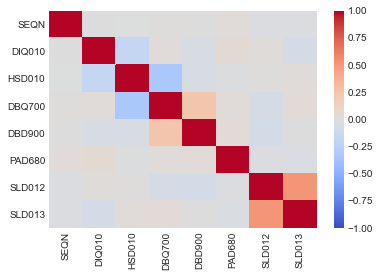

In [37]:
corr_plot = sns.heatmap(behaviour_data.corr(), vmin = -1, vmax = 1, center = 0, cmap = "coolwarm")


In [38]:
behaviour_data.corr()

,SEQN,DIQ010,HSD010,DBQ700,DBD900,PAD680,SLD012,SLD013
SEQN,1.000000,0.000351,-0.003016,0.010532,0.003563,0.027782,-0.017508,-0.016441
DIQ010,0.000351,1.000000,-0.164090,0.023898,-0.039482,0.050043,0.016714,-0.064515
HSD010,-0.003016,-0.164090,1.000000,-0.326115,-0.044758,-0.010228,0.014681,0.029098
DBQ700,0.010532,0.023898,-0.326115,1.000000,0.246134,0.026824,-0.054875,0.033554
DBD900,0.003563,-0.039482,-0.044758,0.246134,1.000000,0.032971,-0.073845,0.004498
PAD680,0.027782,0.050043,-0.010228,0.026824,0.032971,1.000000,-0.017138,-0.030649
SLD012,-0.017508,0.016714,0.014681,-0.054875,-0.073845,-0.017138,1.000000,0.516107
SLD013,-0.016441,-0.064515,0.029098,0.033554,0.004498,-0.030649,0.516107,1.000000


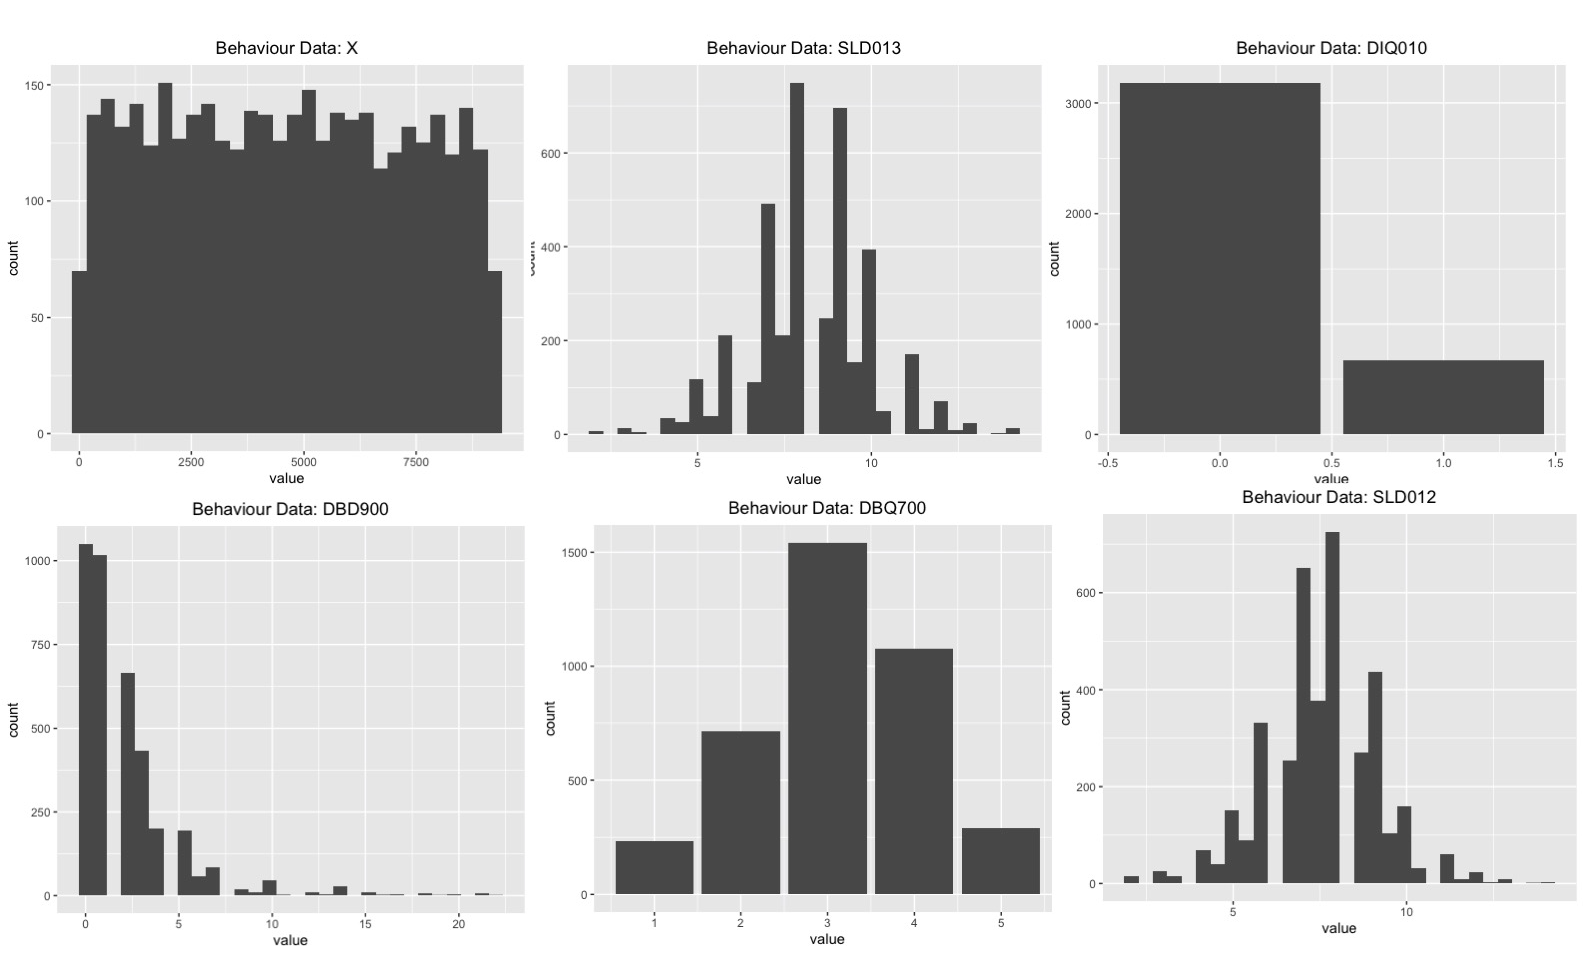

In [39]:
# Regression for Behavioural Variables - DIQ010 (Diabetes Diagnosis)

xtrain = sm.add_constant(behaviour_data[["DBQ700", "DBD900", "PAD680", "SLD012", "SLD013"]])

ytrain = behaviour_data["DIQ010"]

behaviour_regression = sm.Logit(ytrain, xtrain).fit()

behaviour_regression.summary()

Optimization terminated successfully.
         Current function value: 0.456904
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DIQ010   No. Observations:                 3859
Model:                          Logit   Df Residuals:                     3853
Method:                           MLE   Df Model:                            5
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                 0.01443
Time:                        17:34:48   Log-Likelihood:                -1763.2
converged:                       True   LL-Null:                       -1789.0
Covariance Type:            nonrobust   LLR p-value:                 6.376e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6024      0.282     -5.683      0.000      -2.155      -1.050
DBQ700         0.1089      0.045      2.447      0.014       0.022       0.196
DBD900        -0.0507      0.018     -2.790      0.005      -0.086      -0.015
PAD680         0.0006      0.000      3.081      0.002       0.000       0.001
SLD012         0.1254      0.033      3.779      0.000       0.060       0.190
SLD013        -0.1665      0.031     -5.326      0.000      -0.228      -0.105
==============================================================================
"""

In [40]:
# Regression for Behavioural Variables - HSD010 (Health Status)

xtrain = sm.add_constant(behaviour_data[["DBQ700", "DBD900", "PAD680", "SLD012", "SLD013"]])

ytrain = behaviour_data["HSD010"]

behaviour_regression = sm.Logit(ytrain, xtrain).fit()

behaviour_regression.summary()

Optimization terminated successfully.
         Current function value: 0.488958
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 HSD010   No. Observations:                 3859
Model:                          Logit   Df Residuals:                     3853
Method:                           MLE   Df Model:                            5
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.1088
Time:                        17:34:48   Log-Likelihood:                -1886.9
converged:                       True   LL-Null:                       -2117.2
Covariance Type:            nonrobust   LLR p-value:                 2.601e-97
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8961      0.282     13.799      0.000       3.343       4.449
DBQ700        -0.9345      0.049    -19.220      0.000      -1.030      -0.839
DBD900         0.0376      0.015      2.527      0.012       0.008       0.067
PAD680      -1.16e-05      0.000     -0.058      0.953      -0.000       0.000
SLD012        -0.0480      0.029     -1.668      0.095      -0.104       0.008
SLD013         0.0809      0.027      2.984      0.003       0.028       0.134
==============================================================================
"""

In [41]:
# Regression for Significant Behavioural Variables - HSD010 (Health Status)

xtrain = sm.add_constant(behaviour_data[["DBQ700", "DBD900", "SLD013"]])

ytrain = behaviour_data["HSD010"]

behaviour_regression = sm.Logit(ytrain, xtrain).fit()

behaviour_regression.summary()

Optimization terminated successfully.
         Current function value: 0.489321
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 HSD010   No. Observations:                 3859
Model:                          Logit   Df Residuals:                     3855
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.1081
Time:                        17:34:49   Log-Likelihood:                -1888.3
converged:                       True   LL-Null:                       -2117.2
Covariance Type:            nonrobust   LLR p-value:                 6.838e-99
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7028      0.248     14.902      0.000       3.216       4.190
DBQ700        -0.9294      0.048    -19.172      0.000      -1.024      -0.834
DBD900         0.0393      0.015      2.650      0.008       0.010       0.068
SLD013         0.0575      0.023      2.501      0.012       0.012       0.103
==============================================================================
"""

### Analysis for Demographic Variables

**Demographic variables of Interest**

- RIAGENDR - Gender
- RIDAGEYR - Age in years at screening
- RIDRETH3 - Race
- DMDEDUC2 - Education level - Adults 20+
- INDFMPIR - Ratio of family income to poverty

In [42]:
demographic_data

,SEQN,DIQ010,HSD010,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,INDFMPIR
2,93705.0,0.0,1.0,2.0,66.0,4.0,2.0,0.82
5,93708.0,1.0,1.0,2.0,66.0,6.0,1.0,1.63
8,93711.0,0.0,1.0,1.0,56.0,6.0,5.0,5.00
10,93713.0,0.0,1.0,1.0,67.0,3.0,3.0,2.65
11,93714.0,1.0,1.0,2.0,54.0,4.0,4.0,1.86
...,...,...,...,...,...,...,...,...
9246,102949.0,0.0,1.0,1.0,33.0,3.0,3.0,1.01
9249,102952.0,1.0,1.0,2.0,70.0,6.0,3.0,0.95
9250,102953.0,0.0,0.0,1.0,42.0,1.0,3.0,NaN
9251,102954.0,0.0,1.0,2.0,41.0,4.0,5.0,1.18


In [43]:
# Look at the percent of missing values for each variable 
na_perc = demographic_data.isnull().sum()/len(demographic_data)*100
print(na_perc)

# all variables seem okay to keep

SEQN         0.000000
DIQ010       0.000000
HSD010       0.000000
RIAGENDR     0.000000
RIDAGEYR     0.000000
RIDRETH3     0.000000
DMDEDUC2     2.396645
INDFMPIR    12.362692
dtype: float64


In [44]:
len(demographic_data)

5007

In [45]:
# Drop missing values

demographic_data = demographic_data.dropna()

In [46]:
len(demographic_data)

4281

In [47]:
# Cleaning for DMDEDUC2
# Convert 7 and 9 to Nan; Remove missing values

demographic_data['DMDEDUC2'] = demographic_data['DMDEDUC2'].astype('Int64')

demographic_data.loc[demographic_data['DMDEDUC2'] == 7, 'DMDEDUC2'] = np.nan
demographic_data.loc[demographic_data['DMDEDUC2'] == 9, 'DMDEDUC2'] = np.nan

demographic_data = demographic_data.dropna(axis=0, subset=['DMDEDUC2'])

demographic_data['DMDEDUC2'] = demographic_data['DMDEDUC2'].astype('Float64')


# Cleaning for RIAGENDR
# Convert 2 to 0

demographic_data['RIAGENDR'] = demographic_data['RIAGENDR'].astype('Int64')

demographic_data.loc[demographic_data['RIAGENDR'] == 2, 'RIAGENDR'] = 0

demographic_data['RIAGENDR'] = demographic_data['RIAGENDR'].astype('Float64')


<ipython-input-47-683399a1a73f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data['DMDEDUC2'] = demographic_data['DMDEDUC2'].astype('Int64')
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [48]:
len(demographic_data)

4278

In [49]:
# Cleaning for RIDRETH3
# Create dummy variables for each coded Race

demographic_data = demographic_data.assign(
    RACE_MEXAM = lambda dataframe: dataframe['RIDRETH3'].map(lambda RIDRETH3: 1 if RIDRETH3 == 1 else 0),
    RACE_OTHHIS = lambda dataframe: dataframe['RIDRETH3'].map(lambda RIDRETH3: 1 if RIDRETH3 == 2 else 0),
    RACE_WHITE = lambda dataframe: dataframe['RIDRETH3'].map(lambda RIDRETH3: 1 if RIDRETH3 == 3 else 0),
    RACE_BLACK = lambda dataframe: dataframe['RIDRETH3'].map(lambda RIDRETH3: 1 if RIDRETH3 == 4 else 0),
    RACE_ASIAN = lambda dataframe: dataframe['RIDRETH3'].map(lambda RIDRETH3: 1 if RIDRETH3 == 6 else 0),
    RACE_OTHER = lambda dataframe: dataframe['RIDRETH3'].map(lambda RIDRETH3: 1 if RIDRETH3 == 7 else 0)
)
                                                        

In [50]:
demographic_data

,SEQN,DIQ010,HSD010,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,INDFMPIR,RACE_MEXAM,RACE_OTHHIS,RACE_WHITE,RACE_BLACK,RACE_ASIAN,RACE_OTHER
2,93705.0,0.0,1.0,0.0,66.0,4.0,2.0,0.82,0,0,0,1,0,0
5,93708.0,1.0,1.0,0.0,66.0,6.0,1.0,1.63,0,0,0,0,1,0
8,93711.0,0.0,1.0,1.0,56.0,6.0,5.0,5.00,0,0,0,0,1,0
10,93713.0,0.0,1.0,1.0,67.0,3.0,3.0,2.65,0,0,1,0,0,0
11,93714.0,1.0,1.0,0.0,54.0,4.0,4.0,1.86,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9244,102947.0,0.0,1.0,1.0,75.0,4.0,5.0,4.28,0,0,0,1,0,0
9246,102949.0,0.0,1.0,1.0,33.0,3.0,3.0,1.01,0,0,1,0,0,0
9249,102952.0,1.0,1.0,0.0,70.0,6.0,3.0,0.95,0,0,0,0,1,0
9251,102954.0,0.0,1.0,0.0,41.0,4.0,5.0,1.18,0,0,0,1,0,0


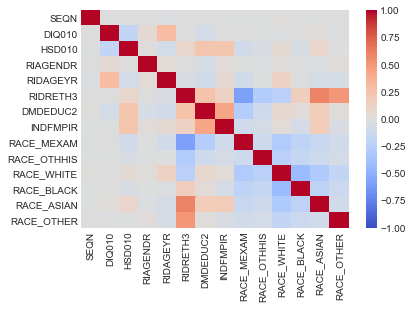

In [51]:
corr_plot = sns.heatmap(demographic_data.corr(), vmin = -1, vmax = 1, center = 0, cmap = "coolwarm")


In [52]:
demographic_data.corr()

,SEQN,DIQ010,HSD010,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,INDFMPIR,RACE_MEXAM,RACE_OTHHIS,RACE_WHITE,RACE_BLACK,RACE_ASIAN,RACE_OTHER
SEQN,1.000000,0.006812,-0.012898,0.001013,-0.017763,0.003246,0.007947,-0.003750,-0.009727,-0.005048,0.012505,-0.001126,-0.004667,0.002917
DIQ010,0.006812,1.000000,-0.180075,0.062268,0.311189,0.003553,-0.071335,-0.007221,0.003612,-0.003206,-0.014514,0.011388,0.015731,-0.015179
HSD010,-0.012898,-0.180075,1.000000,0.011292,-0.078290,0.091737,0.246143,0.238333,-0.089769,-0.037404,0.052609,-0.041811,0.098709,-0.005623
RIAGENDR,0.001013,0.062268,0.011292,1.000000,0.033550,0.003764,-0.053230,0.031092,-0.006438,-0.008840,0.016048,-0.004201,-0.019579,0.023562
RIDAGEYR,-0.017763,0.311189,-0.078290,0.033550,1.000000,-0.031755,-0.086282,0.054689,-0.092785,-0.000240,0.142178,-0.014754,-0.059283,-0.051800
RIDRETH3,0.003246,0.003553,0.091737,0.003764,-0.031755,1.000000,0.263947,0.134404,-0.587643,-0.284628,-0.239550,0.167145,0.607182,0.511028
DMDEDUC2,0.007947,-0.071335,0.246143,-0.053230,-0.086282,0.263947,1.000000,0.444744,-0.266145,-0.104875,0.072965,0.036295,0.186975,0.016314
INDFMPIR,-0.003750,-0.007221,0.238333,0.031092,0.054689,0.134404,0.444744,1.000000,-0.097001,-0.056760,0.038259,-0.066772,0.191760,-0.034439
RACE_MEXAM,-0.009727,0.003612,-0.089769,-0.006438,-0.092785,-0.587643,-0.266145,-0.097001,1.000000,-0.116604,-0.294227,-0.205679,-0.149322,-0.089763
RACE_OTHHIS,-0.005048,-0.003206,-0.037404,-0.008840,-0.000240,-0.284628,-0.104875,-0.056760,-0.116604,1.000000,-0.237487,-0.166016,-0.120526,-0.072453


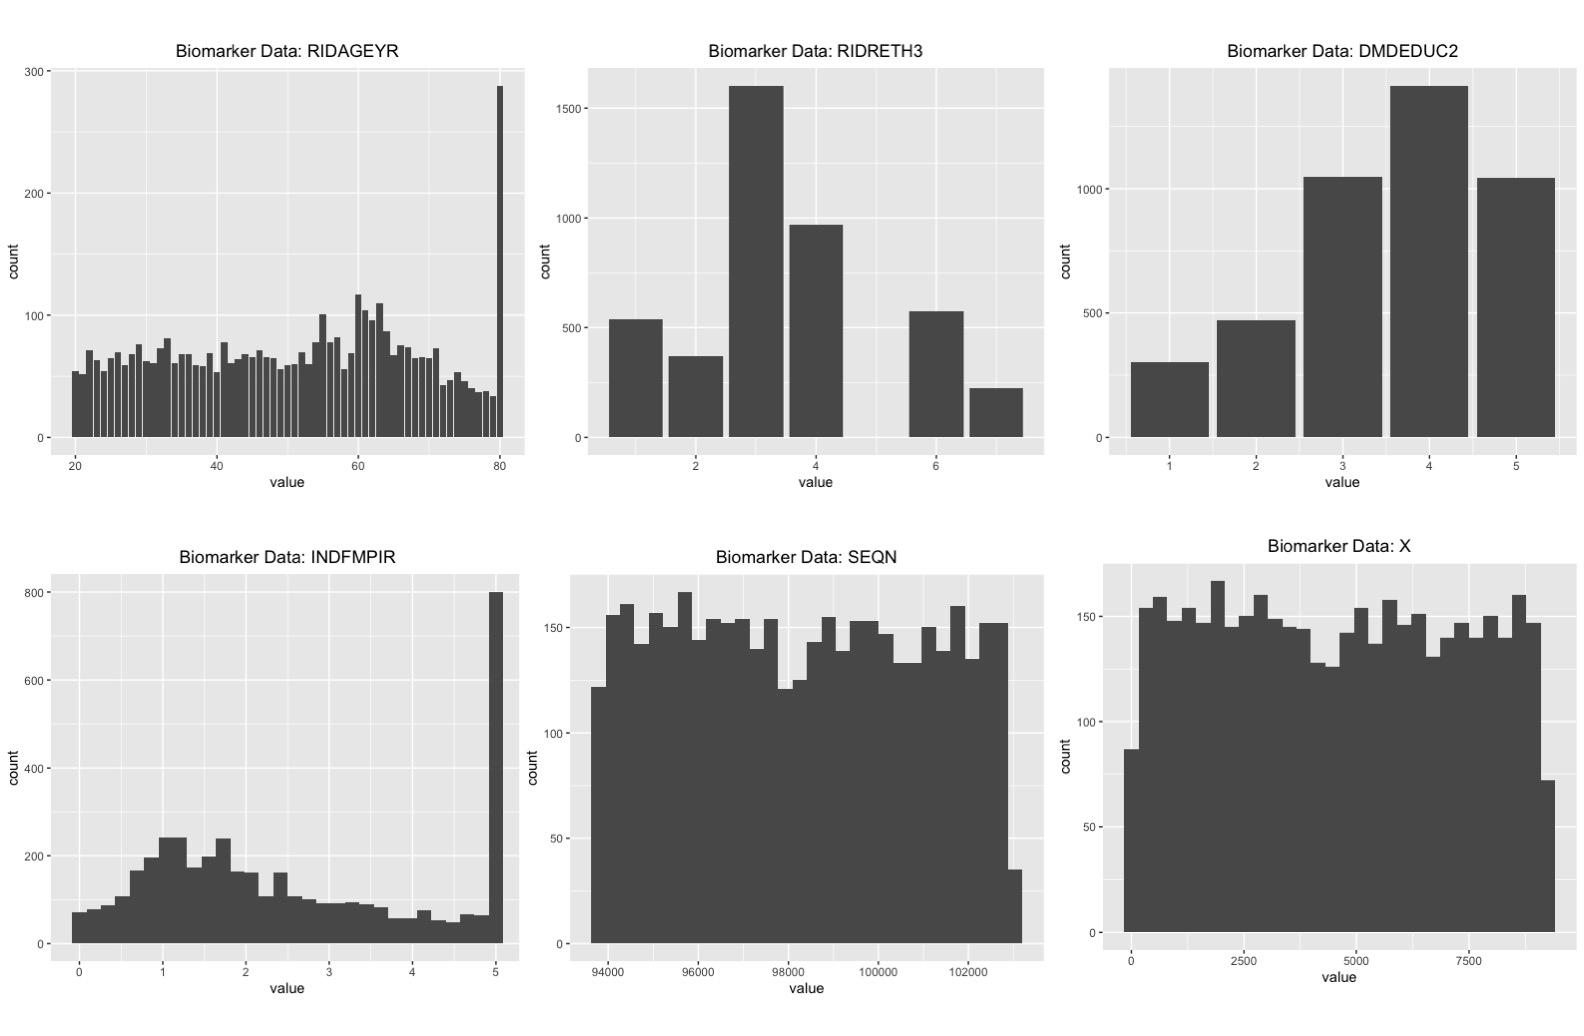

In [53]:
# Regression for Demographic Variables - DIQ010 (Diabetes Diagnosis)

xtrain = sm.add_constant(demographic_data[["RIAGENDR", "RIDAGEYR", "RACE_MEXAM", 
                                           "RACE_OTHHIS", "RACE_WHITE", "RACE_BLACK", 
                                           "RACE_ASIAN", "RACE_OTHER","DMDEDUC2", "INDFMPIR"]])

ytrain = demographic_data["DIQ010"]

demographic_regression = sm.Logit(ytrain, xtrain).fit()

demographic_regression.summary()

Optimization terminated successfully.
         Current function value: 0.426911
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DIQ010   No. Observations:                 4278
Model:                          Logit   Df Residuals:                     4268
Method:                           MLE   Df Model:                            9
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.1190
Time:                        17:34:50   Log-Likelihood:                -1826.3
converged:                       True   LL-Null:                       -2073.1
Covariance Type:            nonrobust   LLR p-value:                1.442e-100
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.7110   3.84e+06  -9.66e-07      1.000   -7.53e+06    7.53e+06
RIAGENDR        0.3004      0.083      3.601      0.000       0.137       0.464
RIDAGEYR        0.0550      0.003     18.978      0.000       0.049       0.061
RACE_MEXAM     -0.4626   3.84e+06   -1.2e-07      1.000   -7.53e+06    7.53e+06
RACE_OTHHIS    -0.7129   3.84e+06  -1.86e-07      1.000   -7.53e+06    7.53e+06
RACE_WHITE     -0.9567   3.84e+06  -2.49e-07      1.000   -7.53e+06    7.53e+06
RACE_BLACK     -0.5863   3.84e+06  -1.53e-07      1.000   -7.53e+06    7.53e+06
RACE_ASIAN     -0.3181   3.84e+06  -8.28e-08      1.000   -7.53e+06    7.53e+06
RACE_OTHER     -0.6744   3.84e+06  -1.76e-07      1.000   -7.53e+06    7.53e+06
DMDEDUC2       -0.0722      0.040     -1.825      0.068      -0.150       0.005
INDFMPIR       -0.0179      0.030     -0.603      0.547      -0.076       0.040
===============================================================================
"""

In [54]:
# Regression for Demographic Variables - HSD010 (Health Status)

xtrain = sm.add_constant(demographic_data[["RIAGENDR", "RIDAGEYR", "RACE_MEXAM", 
                                           "RACE_OTHHIS", "RACE_WHITE", "RACE_BLACK", 
                                           "RACE_ASIAN", "RACE_OTHER","DMDEDUC2", "INDFMPIR"]])

ytrain = demographic_data["HSD010"]

demographic_regression = sm.Logit(ytrain, xtrain).fit()

demographic_regression.summary()

Optimization terminated successfully.
         Current function value: 0.510029
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 HSD010   No. Observations:                 4278
Model:                          Logit   Df Residuals:                     4268
Method:                           MLE   Df Model:                            9
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                 0.08649
Time:                        17:34:50   Log-Likelihood:                -2181.9
converged:                       True   LL-Null:                       -2388.5
Covariance Type:            nonrobust   LLR p-value:                 2.111e-83
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0155   3.09e+06   5.02e-09      1.000   -6.06e+06    6.06e+06
RIAGENDR        0.0891      0.075      1.186      0.236      -0.058       0.236
RIDAGEYR       -0.0118      0.002     -5.413      0.000      -0.016      -0.008
RACE_MEXAM     -0.2208   3.09e+06  -7.14e-08      1.000   -6.06e+06    6.06e+06
RACE_OTHHIS    -0.0591   3.09e+06  -1.91e-08      1.000   -6.06e+06    6.06e+06
RACE_WHITE      0.1492   3.09e+06   4.82e-08      1.000   -6.06e+06    6.06e+06
RACE_BLACK     -0.1707   3.09e+06  -5.52e-08      1.000   -6.06e+06    6.06e+06
RACE_ASIAN      0.3837   3.09e+06   1.24e-07      1.000   -6.06e+06    6.06e+06
RACE_OTHER     -0.0668   3.09e+06  -2.16e-08      1.000   -6.06e+06    6.06e+06
DMDEDUC2        0.2951      0.036      8.201      0.000       0.225       0.366
INDFMPIR        0.2828      0.028      9.995      0.000       0.227       0.338
===============================================================================
"""

In [55]:
# Regression for Significant Demographic Variables - DIQ010 (Diabetes Diagnosis)

xtrain = sm.add_constant(demographic_data[["RIAGENDR", "RIDAGEYR"]])

ytrain = demographic_data["DIQ010"]

demographic_regression = sm.Logit(ytrain, xtrain).fit()

demographic_regression.summary()

Optimization terminated successfully.
         Current function value: 0.431238
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DIQ010   No. Observations:                 4278
Model:                          Logit   Df Residuals:                     4275
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.1101
Time:                        17:34:50   Log-Likelihood:                -1844.8
converged:                       True   LL-Null:                       -2073.1
Covariance Type:            nonrobust   LLR p-value:                7.674e-100
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5081      0.175    -25.814      0.000      -4.850      -4.166
RIAGENDR       0.2901      0.083      3.501      0.000       0.128       0.452
RIDAGEYR       0.0518      0.003     19.028      0.000       0.046       0.057
==============================================================================
"""

In [56]:
# Regression for Demographic Variables - HSD010 (Health Status)

xtrain = sm.add_constant(demographic_data[["RIDAGEYR", "DMDEDUC2", "INDFMPIR"]])

ytrain = demographic_data["HSD010"]

demographic_regression = sm.Logit(ytrain, xtrain).fit()

demographic_regression.summary()

Optimization terminated successfully.
         Current function value: 0.513124
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 HSD010   No. Observations:                 4278
Model:                          Logit   Df Residuals:                     4274
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                 0.08095
Time:                        17:34:50   Log-Likelihood:                -2195.1
converged:                       True   LL-Null:                       -2388.5
Covariance Type:            nonrobust   LLR p-value:                 1.688e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1016      0.161     -0.631      0.528      -0.417       0.214
RIDAGEYR      -0.0107      0.002     -4.998      0.000      -0.015      -0.006
DMDEDUC2       0.3192      0.034      9.430      0.000       0.253       0.386
INDFMPIR       0.2959      0.028     10.604      0.000       0.241       0.351
==============================================================================
"""

### Significant Predictors of DIQ010 (Diabetes Diagnosis)

$$P(Z) = \frac{e^{\hat\beta_0 + \hat\beta_1X}}{1 + e^{\hat\beta_0 + \hat\beta_1X}}$$


**Biomarker**<br>
Pseudo $R^2$ = 0.2864
- LBXSNASI - Sodium
- BMXBMI - BMI
- LBDGLUSI - Glucose


$$P(Diabetes) = \frac{e^{-18.3 + 0.072*Sodium + 0.028*BMI + 0.9176*Glucose}}{1 + e^{-18.3 + 0.072*Sodium + 0.028*BMI + 0.9176*Glucose}}$$


**Behavioural**<br>
Pseudo $R^2$ = 0.01443
- DBQ700 - Healthiness of diet
- DBD900 - Frequency of fast food
- PAD680 - Minutes of sedentary activity
- SLD012 - Sleep hours, weekdays/workdays
- SLD013 - Sleep hours, weekends


$$P(Diabetes) = \frac{e^{-1.6024 + 0.1089*Diet + -0.0507*FastFood + 0.0006*Sedentary + 0.1254*SleepWeekday - 0.1665*SleepWeekend}}{1 + e^{-1.6024 + 0.1089*Diet + -0.0507*FastFood + 0.0006*Sedentary + 0.1254*SleepWeekday - 0.1665*SleepWeekend}}$$


**Demographic**<br>
Pseudo $R^2$ = 0.1101
- RIAGENDR - Gender
- RIDAGEYR - Age	


$$P(Diabetes) = \frac{e^{-4.51 + 0.2901*Gender + 0.0518*Age}}{1 + e^{-4.51 + 0.2901*Gender + 0.0518*Age}}$$



### Significant Predictors of HSD010 (Health Status)

**Biomarker**<br>
Pseudo $R^2$ = 0.04377
- BMXWT - Body weight
- BMXBMI - BMI
- LBDGLUSI - Glucose


$$P(Healthy) = \frac{e^{3.2813 + 0.0145*Weight - 0.0946*BMI - 0.0866*Glucose}}{1 + e^{3.2813 + 0.0145*Weight - 0.0946*BMI - 0.0866*Glucose}}$$



**Behavioural**<br>
Pseudo $R^2$ = 0.1081
- DBQ700 - Healthiness of diet
- DBD900 - Frequency of fast food
- SLD013 - Sleep hours, weekends


$$P(Healthy) = \frac{e^{3.7028 - 0.9294*Diet + 0.0393*FastFood + 0.0575*SleepWeekend}}{1 + e^{3.7028 - 0.9294*Diet + 0.0393*FastFood + 0.0575*SleepWeekend}}$$


**Demographic**<br>
Pseudo $R^2$ = 0.08095
- RIDAGEYR - Age
- DMDEDUC2 - Education Level
- INDFMPIR - Ratio of Income to Poverty

$$P(Healthy) = \frac{e^{-0.1016 - 0.0107*Age + 0.3192*Education + 0.2959*Income}}{1 + e^{-0.1016 - 0.0107*Age + 0.3192*Education + 0.2959*Income}}$$



## Combined Analysis <a class="anchor" id="Combined_Analysis"></a>

After completing the 3 logistic regression models on the demographic, biomarker and behavioural datasets, we discovered predictors that have a significant impact on diabetes outcome and on individual’s self-reported health score. Following these analyses, we then wanted to combine all of the datasets to assess if the combination of the independent variables results in a different model that best predicts diabetes outcome and individual’s self-reported health score. 

In [57]:
# Inner-Join the datasets with the variables of interest

biomarker_data = biomarker_data[["SEQN", "DIQ010", "HSD010", "LBXSNASI", "BMXWT", "BMXBMI", "LBDGLUSI"]]
behaviour_data = behaviour_data[["SEQN", "DBQ700", "DBD900", "PAD680", "SLD012", "SLD013"]]
demographic_data = demographic_data[["SEQN", "RIAGENDR", "RIDAGEYR", "DMDEDUC2", "INDFMPIR"]]

combined_data = biomarker_data
combined_data = pd.merge(combined_data, behaviour_data,on="SEQN",how='inner')
combined_data = pd.merge(combined_data, demographic_data,on="SEQN",how='inner')

combined_data

,SEQN,DIQ010,HSD010,LBXSNASI,BMXWT,BMXBMI,LBDGLUSI,DBQ700,DBD900,PAD680,SLD012,SLD013,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR
0,93708.0,1.0,1.0,144.0,53.5,23.7,6.77,1.0,5.397605e-79,120.0,8.0,8.0,0.0,66.0,1.0,1.63
1,93711.0,0.0,1.0,140.0,62.1,21.3,5.94,2.0,5.397605e-79,420.0,7.0,9.0,1.0,56.0,5.0,5.00
2,93717.0,0.0,1.0,138.0,74.4,24.5,5.05,2.0,5.397605e-79,300.0,8.0,10.0,1.0,22.0,3.0,1.49
3,93718.0,0.0,1.0,141.0,54.4,22.0,4.94,3.0,5.397605e-79,240.0,8.0,11.0,1.0,45.0,3.0,1.18
4,93721.0,0.0,1.0,144.0,85.1,35.9,5.77,3.0,1.000000e+00,120.0,9.0,9.0,0.0,60.0,1.0,3.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,102920.0,0.0,1.0,138.0,73.0,28.7,5.94,4.0,2.000000e+00,240.0,7.0,8.0,0.0,62.0,4.0,5.00
1486,102923.0,1.0,0.0,138.0,106.1,35.1,6.83,3.0,2.000000e+00,300.0,9.0,9.0,0.0,43.0,3.0,0.95
1487,102947.0,0.0,1.0,142.0,73.2,25.2,4.72,2.0,1.000000e+00,240.0,7.0,8.0,1.0,75.0,5.0,4.28
1488,102952.0,1.0,1.0,143.0,49.0,20.0,8.77,1.0,5.397605e-79,120.0,8.5,8.5,0.0,70.0,3.0,0.95


In [58]:
# Regression for All Variables on Combined Dataset - DIQ010 (Diabetes Diagnosis)

xtrain = sm.add_constant(combined_data[["LBXSNASI", "BMXBMI", "LBDGLUSI", 
                                        "DBQ700", "DBD900", "PAD680", "SLD012", "SLD013",
                                        "RIAGENDR", "RIDAGEYR"]])

ytrain = combined_data["DIQ010"]

combined_regression = sm.Logit(ytrain, xtrain).fit()

combined_regression.summary()

Optimization terminated successfully.
         Current function value: 0.309946
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DIQ010   No. Observations:                 1490
Model:                          Logit   Df Residuals:                     1479
Method:                           MLE   Df Model:                           10
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.3675
Time:                        17:34:50   Log-Likelihood:                -461.82
converged:                       True   LL-Null:                       -730.09
Covariance Type:            nonrobust   LLR p-value:                6.770e-109
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.2408      4.493     -2.947      0.003     -22.047      -4.434
LBXSNASI       0.0181      0.031      0.577      0.564      -0.043       0.079
BMXBMI         0.0325      0.012      2.688      0.007       0.009       0.056
LBDGLUSI       0.8175      0.069     11.823      0.000       0.682       0.953
DBQ700         0.1437      0.094      1.523      0.128      -0.041       0.329
DBD900         0.0304      0.033      0.926      0.355      -0.034       0.095
PAD680     -6.936e-05      0.000     -0.160      0.873      -0.001       0.001
SLD012         0.1069      0.070      1.518      0.129      -0.031       0.245
SLD013        -0.1544      0.065     -2.381      0.017      -0.282      -0.027
RIAGENDR       0.1145      0.174      0.657      0.511      -0.227       0.456
RIDAGEYR       0.0500      0.006      8.011      0.000       0.038       0.062
==============================================================================
"""

In [59]:
# Regression for Significant Variables on Combined Dataset - DIQ010 (Diabetes Diagnosis)

xtrain = sm.add_constant(combined_data[["LBDGLUSI", "BMXBMI", "SLD013","RIDAGEYR"]])

ytrain = combined_data["DIQ010"]

combined_regression = sm.Logit(ytrain, xtrain).fit()

combined_regression.summary()

Optimization terminated successfully.
         Current function value: 0.312148
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DIQ010   No. Observations:                 1490
Model:                          Logit   Df Residuals:                     1485
Method:                           MLE   Df Model:                            4
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.3630
Time:                        17:34:50   Log-Likelihood:                -465.10
converged:                       True   LL-Null:                       -730.09
Covariance Type:            nonrobust   LLR p-value:                2.186e-113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8022      0.771    -12.712      0.000     -11.314      -8.291
LBDGLUSI       0.8114      0.068     11.948      0.000       0.678       0.944
BMXBMI         0.0344      0.012      2.975      0.003       0.012       0.057
SLD013        -0.0935      0.051     -1.847      0.065      -0.193       0.006
RIDAGEYR       0.0491      0.006      8.286      0.000       0.037       0.061
==============================================================================
"""

In [60]:
# Regression for Significant Variables on Combined Dataset - DIQ010 (Diabetes Diagnosis) - REPEATED

xtrain = sm.add_constant(combined_data[["LBDGLUSI", "BMXBMI", "RIDAGEYR"]])

ytrain = combined_data["DIQ010"]

combined_regression = sm.Logit(ytrain, xtrain).fit()

combined_regression.summary()

Optimization terminated successfully.
         Current function value: 0.313296
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DIQ010   No. Observations:                 1490
Model:                          Logit   Df Residuals:                     1486
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.3606
Time:                        17:34:50   Log-Likelihood:                -466.81
converged:                       True   LL-Null:                       -730.09
Covariance Type:            nonrobust   LLR p-value:                8.342e-114
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.5687      0.661    -15.995      0.000     -11.864      -9.274
LBDGLUSI       0.8040      0.067     12.018      0.000       0.673       0.935
BMXBMI         0.0347      0.012      3.003      0.003       0.012       0.057
RIDAGEYR       0.0498      0.006      8.462      0.000       0.038       0.061
==============================================================================
"""

In [61]:
# Regression for All Variables on Combined Dataset - HSD010 (Health Status)

xtrain = sm.add_constant(combined_data[["BMXWT", "BMXBMI", "LBDGLUSI", 
                                        "DBQ700", "DBD900", "SLD013",
                                        "RIDAGEYR", "DMDEDUC2", "INDFMPIR"]])

ytrain = combined_data["HSD010"]

combined_regression = sm.Logit(ytrain, xtrain).fit()

combined_regression.summary()

Optimization terminated successfully.
         Current function value: 0.438463
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 HSD010   No. Observations:                 1490
Model:                          Logit   Df Residuals:                     1480
Method:                           MLE   Df Model:                            9
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.2037
Time:                        17:34:50   Log-Likelihood:                -653.31
converged:                       True   LL-Null:                       -820.42
Covariance Type:            nonrobust   LLR p-value:                 1.413e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8208      0.660      7.302      0.000       3.527       6.115
BMXWT         -0.0023      0.007     -0.341      0.733      -0.016       0.011
BMXBMI        -0.0453      0.020     -2.227      0.026      -0.085      -0.005
LBDGLUSI      -0.0891      0.033     -2.663      0.008      -0.155      -0.024
DBQ700        -0.8441      0.085     -9.890      0.000      -1.011      -0.677
DBD900         0.0214      0.025      0.871      0.384      -0.027       0.070
SLD013         0.0772      0.040      1.941      0.052      -0.001       0.155
RIDAGEYR      -0.0186      0.004     -4.201      0.000      -0.027      -0.010
DMDEDUC2       0.2709      0.067      4.027      0.000       0.139       0.403
INDFMPIR       0.2732      0.052      5.292      0.000       0.172       0.374
==============================================================================
"""

In [62]:
# Regression for Significant Variables on Combined Dataset - HSD010 (Health Status)

xtrain = sm.add_constant(combined_data[["BMXBMI", "LBDGLUSI","DBQ700", "RIDAGEYR", "DMDEDUC2", "INDFMPIR"]])

ytrain = combined_data["HSD010"]

combined_regression = sm.Logit(ytrain, xtrain).fit()

combined_regression.summary()

Optimization terminated successfully.
         Current function value: 0.440065
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 HSD010   No. Observations:                 1490
Model:                          Logit   Df Residuals:                     1483
Method:                           MLE   Df Model:                            6
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.2008
Time:                        17:34:50   Log-Likelihood:                -655.70
converged:                       True   LL-Null:                       -820.42
Covariance Type:            nonrobust   LLR p-value:                 3.986e-68
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5395      0.561      9.869      0.000       4.439       6.640
BMXBMI        -0.0519      0.009     -5.788      0.000      -0.070      -0.034
LBDGLUSI      -0.0902      0.033     -2.732      0.006      -0.155      -0.025
DBQ700        -0.8229      0.083     -9.890      0.000      -0.986      -0.660
RIDAGEYR      -0.0200      0.004     -4.637      0.000      -0.028      -0.012
DMDEDUC2       0.2610      0.067      3.919      0.000       0.130       0.392
INDFMPIR       0.2768      0.051      5.388      0.000       0.176       0.377
==============================================================================
"""

### Results!

$$P(Z) = \frac{e^{\hat\beta_0 + \hat\beta_1X}}{1 + e^{\hat\beta_0 + \hat\beta_1X}}$$


#### Predictors for DIQ010 (Diabetes Diagnosis)
Pseudo $R^2$ = 0.3606
- LBDGLUSI - Glucose
- BMXBMI - BMI
- RIDAGEYR - Age


$$P(Diabetes) = \frac{e^{-10.57 + 0.804*Glucose + 0.035*BMI + 0.050*Age}}{1 + e^{-10.57 + 0.804*Glucose + 0.035*BMI + 0.050*Age}}$$


#### Predictors for HSD010 (Health Status)
Pseudo $R^2$ = 0.2008
- BMXBMI - BMI
- LBDGLUSI - Glucose
- DBQ700 - Sedentary Activity
- RIDAGEYR - Age
- DMDEDUC2 - Education Level
- INDFMPIR - Ratio of Income to Poverty

$$P(Healthy) = \frac{e^{5.5395 - 0.0519*BMI - 0.0902*Glucose - 0.8229*Sendentary - 0.0200*Age + 0.2610*Education + 0.2768*Income}}{1 + e^{5.5395 - 0.0519*BMI - 0.0902*Glucose - 0.8229*Sendentary - 0.0200*Age + 0.2610*Education + 0.2768*Income}}$$


In [86]:
# Demonstration of Diabetes prediction based on the regression model

glucose = 8 #reasonable values from 4-7, above 7 is considered diabetic
bmi = 35 #most adults from 18.5-25, >30 considered obese
age = 63 #in years

model_input = np.exp(-10.57 + 0.804*glucose + 0.035*bmi + 0.050*age)

probability_diabetes1 = model_input/(1 + model_input)

print("Probability of diabetes is:",probability_diabetes1)

Probability of diabetes is: 0.5589742145184536


In [92]:
# Demonstration of how increasing glucose by 1 point increases probability

glucose = 8 + 1 #reasonable values from 4-7, above 7 is considered diabetic
bmi = 35 #most adults from 18.5-25, >30 considered obese
age = 63 #in years

model_input = np.exp(-10.57 + 0.804*glucose + 0.035*bmi + 0.050*age)

probability_diabetes2 = model_input/(1 + model_input)

print("Probability of diabetes is:",probability_diabetes2)
print("Probability of diabetes increased by",probability_diabetes2 - probability_diabetes1)

Probability of diabetes is: 0.7390429106675065
Probability of diabetes increased by 0.18006869614905285


In [93]:
# Demonstration of how increasing bmi by 1 point increases probability

glucose = 8 #reasonable values from 4-7, above 7 is considered diabetic
bmi = 35 + 1 #most adults from 18.5-25, >30 considered obese
age = 63 #in years

model_input = np.exp(-10.57 + 0.804*glucose + 0.035*bmi + 0.050*age)

probability_diabetes3 = model_input/(1 + model_input)

print("Probability of diabetes is:",probability_diabetes3)
print("Probability of diabetes increased by",probability_diabetes3 - probability_diabetes1)

Probability of diabetes is: 0.5675838360100376
Probability of diabetes increased by 0.008609621491583952


In [94]:
# Demonstration of how increasing age by 1 increases probability

glucose = 8 #reasonable values from 4-7, above 7 is considered diabetic
bmi = 35 #most adults from 18.5-25, >30 considered obese
age = 63 + 1 #in years

model_input = np.exp(-10.57 + 0.804*glucose + 0.035*bmi + 0.050*age)

probability_diabetes4 = model_input/(1 + model_input)

print("Probability of diabetes is:",probability_diabetes4)
print("Probability of diabetes increased by",probability_diabetes4 - probability_diabetes1)

Probability of diabetes is: 0.5712615251451862
Probability of diabetes increased by 0.012287310626732606


In [63]:
# Cross Validation - DIQ010 (Diabetes Diagnosis)
## Split the data into train and test sets
## Train the model on the training set, then predict values with the test set


X = combined_data[["LBDGLUSI", "BMXBMI", "RIDAGEYR"]]
y = combined_data["DIQ010"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [64]:
# Predict value of y and print the accuracy of the model - DIQ010 (Diabetes Diagnosis)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set for "Diabetes Diagnosis": {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set for "Diabetes Diagnosis": 0.88


In [65]:
# Cross Validation - HSD010 (Health Status)
## Split the data into train and test sets
## Train the model on the training set, then predict values with the test set


X = combined_data[["BMXBMI", "LBDGLUSI","DBQ700", "RIDAGEYR", "DMDEDUC2", "INDFMPIR"]]
y = combined_data["HSD010"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [66]:
# Predict value of y and print the accuracy of the model - HSD010 (Health Status)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set for "Health Status": {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set for "Health Status": 0.77


<AxesSubplot:xlabel='DIQ010', ylabel='count'>

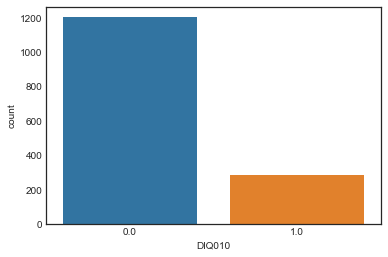

In [67]:
#Show diabetes data is imbalanced
sns.countplot(x = "DIQ010", data = combined_data)

<AxesSubplot:xlabel='HSD010', ylabel='count'>

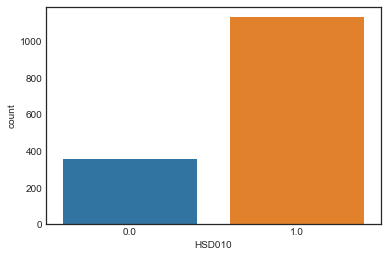

In [68]:
#Show health data is imbalanced
sns.countplot(x = "HSD010", data = combined_data)

## Discussion <a class="anchor" id="Discussion"></a>

The final logistic regression model for predicting diabetes status contains 3 variables - fasting plasma glucose, BMI, and age. We were interested that there was representation from biomarker and demographic variables. While BMI and age are typically considered to be risk factors, fasting plasma glucose levels is a blood test that is typically conducted to give evidence for a diabetes diagnosis; thus these were not unexpected. Behavioural variables were not included in our final predicting model; however, that is not to say that behaviour does not impact one’s likelihood of diabetes diagnosis, this can only be said for the present data and methods.

For the regression model predicting Health Status, there were 6 predictor variables - BMI, fasting plasma glucose, sedentary activity, age, education, and income (ratio of family income to poverty). Of note, the presence of a biomarker predictor (fasting plasma glucose) was surprising to arise from an analysis for self-reported score of health since people are not likely to take these values into account. It should not be that surprising, however, since it is likely that behaviours and other factors (like genetics) that contribute to altered states of health would also be made manifest in measurable metrics like blood glucose levels. As expected, factors that one could easily attribute to health status, like BMI and behaviours, were included as predictors of health status. It is also of note that education level and ratio of income to poverty were significant predictors, as socioeconomic factors like these are known to contribute towards to disease and health outcomes (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6352250/).

Below are the regression equations for each model, constructed using the coefficients for each significant predictor:



$$P(Diabetes) = \frac{e^{-10.57 + 0.804*Glucose + 0.035*BMI + 0.050*Age}}{1 + e^{-10.57 + 0.804*Glucose + 0.035*BMI + 0.050*Age}}$$

<br>

$$P(Healthy) = \frac{e^{5.5395 - 0.0519*BMI - 0.0902*Glucose - 0.8229*Sendentary - 0.0200*Age + 0.2610*Education + 0.2768*Income}}{1 + e^{5.5395 - 0.0519*BMI - 0.0902*Glucose - 0.8229*Sendentary - 0.0200*Age + 0.2610*Education + 0.2768*Income}}$$


Note that the coefficients for each term of the diabetes regression equation are positive; thus increasing glucose, BMI, and/or age will have a positive effect on the probability of diabetes diagnosis. On the other hand, for the model predicting health status, there were a mix of positive and negative coefficients - increasing BMI, glucose, amount of sedentary activity, and/or age acts to decrease probability of a good health score, while education and income have positive effects on the probability of reporting a high health score.

The effect that each variable has on the prediction output of the regression model can be demonstrated by evaluating the probability given certain input values, then by altering those values. For instance, a 63 year-old person with a fasting plasma glucose of 8 mmol/L and a BMI of 35 is predicted by the diabetes diagnosis model to be 55.9% likely to have diabetes. By increasing glucose by 1, the probability is increased by 18.0%; conversely increasing BMI or age by 1 only increases diabetes probability by 0.8% and 1.2%, respectively.

### Strengths

There were some positive aspects to choosing this dataset for analysis. Firstly, this dataset was very large, not only in the hundreds of tests and fields measured for each participant, but it also had a very large sample size of over 9000. Even after cleaning, the logistic regression models were able to be trained on thousands of datapoints. Additionally, the NHANES data collection team conducted a data quality review, ensuring that data was complete, consistent, and was free of illogical values. This lightened the load for us to complete data cleaning. The NHANES data collection process was not only thorough, but also highly transparent - records of all survey questions, physical examinations, and laboratory tests are publicly available, allowing us to be confident in the identity of each data entry. Finally, we noticed that (at least for some variables), the sample population was representative of what we see in the US. For example, about 10% of our participants had diabetes, which is consistent with about 10% of the US population having diabetes (https://www.diabetes.org/resources/statistics/statistics-about-diabetes). This gives us confidence in the randomization and sampling because this survey was not necessarily geared toward diabetes. 

### Limitations/Future Directions

While there were strengths to support our use of the NHANES database, there are still limitations with our analysis and within the data itself. Firstly, the very nature of one of the dependent variables (Health Status) was innately subjective because it was a self-reported value. Self-reported values have some issues with reliability for several reasons - for example, a participant may over-report their health score to avoid admitting poor health; or, participants may exhibit recency bias in their report. Additionally, the Health Status reporting was not diabetes-specific - someone could technically have diabetes which is well-managed with diet, exercise, and pharmaceutical agents, and would thus consider themselves to be in good health. Therefore distinctions between the 2 dependent variables cannot be made strongly. Also, our models do not take into account that individuals from different age groups may be likely to self-report their health differently. We would be interested to see how the model would perform if trained on datasets of varying age ranges. This would be an interesting direction this project could take if continued.

Another limitation comes from the interpretation of the model. Firstly, it is important to understand that health and disease is highly multifactorial, integrating factors like genetics, environment, diet, and others. Thus, any model generated with as few variables as these should not be expected to explain all variability within the data. Additionally, the initial data collection method was not conducted in a longitudinal manner - all responses and tests regarding behaviours, biomarker, and physical assessments were conducted all within close proximity to the declaration of diabetes and health status. Thus (importantly), these models do not act as a predictor of whether a given will develop diabetes, but rather whether they are likely to have diabetes (or poor health) right now. However, these models could serve as good indicators of whether one should get tested for diabetes. For example, the theoretical person given above was predicted to be 55.9% likely to have diabetes, therefore they may want to pursue action to test for diabetes. This type of prediction could benefit low-income citizens of the USA, who do not have health coverage to get regular tests for diseases like diabetes.

A limitation of our analysis is that logistic regression predicts that the dependent variable has equal amounts of samples with the value of each level (0 or 1); however, both our diabetes and health status data are unbalanced. To mitigate this is the future, we would use a tool called Synthetic Minority Oversampling Technique (SMOTE) - this imputes values within the underrepresented level of the dependent variable, balancing the data prior to training the regression model (https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8). Although our Diabetes and Health models were highly predictive (with accuracy of 88% and 77%, respectively), it is likely that balancing the data would reveal a truer accuracy level.
The coded nature of the fields and values from the NHANES database are beneficial at a higher scale because they enable data cleaning and analysis standardization and automation! However, this factor made handling the data and interpreting the codes more difficult for us, as we had to constantly refer to the database libraries to decode the field and value names. 

We also learned a few lessons in conducting this project. Even though the NHANES team put effort into ensuring high data quality, we learned to leave ample time for data cleaning, as this undertaking was a time-consuming and work-intensive task. Also, this was a highly collaborative task, but working in a Jupyter notebook was not conducive to such teamwork. Thus, we resolve to use more collaborative platforms to work on team projects involving coding, such as github (https://github.com/).


---